In [1]:
import os
import numpy as np
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
os.getcwd() # current working direcory

'C:\\Users\\offic'

In [3]:
os.chdir(r"D:\ics-python") #changed current working directory

# DATA AUDIT:

Read given .csv file of
1. Sales_Shipment_Data and making a dataframe dfss.
2. Inventory Stocks and making a dataframe dfis. 

In [4]:
dfss=pd.read_csv(r"D:\ics-python\Integrated Case Study - Python\Sales_Shipment_Data.csv")
dfis=pd.read_csv(r"D:\ics-python\Integrated Case Study - Python\Inventory_Stock_Data.csv") 

# checking shape of df (dataframe)

In [5]:
dfss.shape 
#(rows, columns)

(180519, 46)

In [6]:
dfis.shape 

(118, 11)

# checking no of rows.

In [7]:
dfss.index

RangeIndex(start=0, stop=180519, step=1)

In [8]:
dfis.index

RangeIndex(start=0, stop=118, step=1)

# checking columns in df 

In [9]:
dfss.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Type',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer'],
      dtype='object

In [10]:
dfis.columns

Index(['order-now', 'product id', 'product name', 'avg lead time',
       'avg order qty', 'current stock', 'max lead time', 'max order qty',
       'mod', 'reorder point', 'safety stock'],
      dtype='object')

# No. of numerical and categorical columns:

In [11]:
# for Sales shipment 
numerical_count =dfss.select_dtypes(exclude=['object']).count().sum()
categorical_count =dfss.select_dtypes(include=['object']).count().sum()

# Print results
print("Numerical data count:", numerical_count)
print("Categorical data count:", categorical_count)

Numerical data count: 4332453
Categorical data count: 3971410


In [12]:
# for inventory stocks
numerical_count =dfis.select_dtypes(include=['int64', 'float64']).count().sum()
categorical_count =dfis.select_dtypes(include=['object']).count().sum()

# Print results
print("Numerical data count:", numerical_count)
print("Categorical data count:", categorical_count)

Numerical data count: 1062
Categorical data count: 236


# DATA CLEANING:

1. For Sales Shipment :

In [13]:
dfss1=dfss.copy(deep=True) # making a copy of orginal dataframe (df)

In [14]:
dfss1.head()

Product Category Id    Category Name                           Class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     Customer City Customer Country Customer Fname  Customer Id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  Customer Lname Customer Segment Customer State  ...  \
0           Dunn        Corporate             NM  ...   
1          White        Corporate             CA  ...   
2          Brady        Corporate             IL  ...   
3          Smith        Corporate             IL  ...   
4          Kline        Corporate             NV  ...   

  Order Item Discount Rate  Order Item Id Order Item Product Price  \
0                     0.15         134920                     50.0   
1                     0.16           9722                     50.0   
2                     0.06         129954                     50.0   
3                     0.05           2929                     50.0   
4                     0.05         140056                     50.0   

   Order Item Profit Ratio Order Item Quantity Order Item Total  \
0                     0.11                   2             85.0   
1                     0.11                   2             84.0   
2                     0.33                   2             94.5   
3                     0.29                   2             95.0   
4                     0.50                   2             95.0   

  Order Profit Per Order Product Price  Sales  Sales per customer  
0               9.610000          50.0  100.0                85.0  
1               9.490000          50.0  100.0                84.0  
2              30.709999          50.0  100.0                94.5  
3              27.549999          50.0  100.0                95.0  
4              47.500000          50.0  100.0                95.0  

[5 rows x 46 columns]

In [15]:
dfss1.tail()

Product Category Id     Category Name                    Class  \
180514                   17            Cleats  High Value-Small Number   
180515                   17            Cleats  High Value-Small Number   
180516                    9  Cardio Equipment  High Value-Small Number   
180517                   17            Cleats  High Value-Small Number   
180518                   17            Cleats  High Value-Small Number   

       Customer City Customer Country Customer Fname  Customer Id  \
180514     Escondido          EE. UU.        Charles         9615   
180515       Seattle          EE. UU.        Richard         1971   
180516       Anaheim          EE. UU.           Mary         7663   
180517     San Diego          EE. UU.           Mary          415   
180518    Sacramento          EE. UU.           Mary         7141   

       Customer Lname Customer Segment Customer State  ...  \
180514          Smith        Corporate             CA  ...   
180515         Stokes        Corporate             WA  ...   
180516          Smith        Corporate             CA  ...   
180517          Allen        Corporate             CA  ...   
180518        Jackson        Corporate             CA  ...   

       Order Item Discount Rate  Order Item Id Order Item Product Price  \
180514                     0.16         124746                59.990002   
180515                     0.17          73577                59.990002   
180516                     0.25          60910                99.989998   
180517                     0.13         114288                59.990002   
180518                     0.17          60174                59.990002   

        Order Item Profit Ratio Order Item Quantity Order Item Total  \
180514                    -1.20                   5       251.960007   
180515                     0.47                   5       248.960007   
180516                    -0.13                   5       374.959992   
180517                     0.48                   5       260.959992   
180518                     0.47                   5       248.960007   

       Order Profit Per Order Product Price       Sales  Sales per customer  
180514            -302.350006     59.990002  299.950012          251.960007  
180515             117.010002     59.990002  299.950012          248.960007  
180516             -46.869999     99.989998  499.950012          374.959992  
180517             125.260002     59.990002  299.950012          260.959992  
180518             117.010002     59.990002  299.950012          248.960007  

[5 rows x 46 columns]

In [16]:
dfss1.info()
#concise summary about(memory used,non-null values count,dtype,total values ,no. of columns and their names,index range)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product Category Id            180519 non-null  int64  
 1   Category Name                  180519 non-null  object 
 2   Class                          180519 non-null  object 
 3   Customer City                  180519 non-null  object 
 4   Customer Country               180519 non-null  object 
 5   Customer Fname                 180519 non-null  object 
 6   Customer Id                    180519 non-null  int64  
 7   Customer Lname                 180511 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer Street                180519 non-null  object 
 11  Customer Zipcode               180516 non-null  float64
 12  Delivery Status               

In [17]:
dfss1.isna().sum()

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

# missing data:
* Customer Lname 8 - object 
* Customer Zipcode 3 - float64

In [18]:
#NOTE:Customer Zipcode is a NUMERICAL COLUMN.

print(np.unique(dfss1['Customer Zipcode']))  # to see missing data...its a NaN(blank value). 

[  603.   612.   674.   680.   685.   693.   698.   725.   728.   729.
   736.   745.   784.   791.   795.   921.   949.   953.   957.   969.
   976.   983.  1201.  1841.  1844.  1902.  1960.  2124.  2135.  2148.
  2151.  2155.  2169.  2301.  2360.  2740.  2780.  2860.  2895.  6010.
  6040.  6082.  6457.  6460.  6511.  6516.  6810.  6902.  7002.  7003.
  7047.  7052.  7055.  7060.  7083.  7087.  7093.  7104.  7105.  7111.
  7305.  7306.  7307.  7470.  7728.  7960.  8021.  8302.  8540.  8701.
  8753.  8816.  8817.  8854.  8861.  8901. 10002. 10003. 10009. 10011.
 10016. 10021. 10023. 10024. 10025. 10027. 10028. 10029. 10031. 10032.
 10033. 10040. 10128. 10306. 10312. 10314. 10452. 10453. 10456. 10457.
 10458. 10460. 10461. 10462. 10463. 10466. 10467. 10468. 10469. 10472.
 10473. 10701. 10977. 11103. 11201. 11203. 11204. 11206. 11207. 11208.
 11209. 11210. 11211. 11212. 11213. 11214. 11215. 11216. 11218. 11219.
 11220. 11221. 11223. 11224. 11225. 11226. 11229. 11230. 11233. 11234.
 11235

In [19]:
dfss1.describe().T

count          mean           std  \
Product Category Id            180519.0     31.851451     15.640064   
Customer Id                    180519.0   6691.379495   4162.918106   
Customer Zipcode               180516.0  35921.126914  37542.461122   
Department Id                  180519.0      5.443460      1.629246   
Order Id                       180519.0  36221.894903  21045.379569   
Product Id                     180519.0    692.509764    336.446807   
Benefit per order              180519.0     21.974989    104.433526   
Days for shipment (scheduled)  180519.0      2.931847      1.374449   
Days for shipping (real)       180519.0      3.497654      1.623722   
Latitude                       180519.0     29.719955      9.813646   
Longitude                      180519.0    -84.915675     21.433241   
Order Customer Id              180519.0   6691.379495   4162.918106   
Order Item Cardprod Id         180519.0    692.509764    336.446807   
Order Item Discount            180519.0     20.664741     21.800901   
Order Item Discount Rate       180519.0      0.101668      0.070415   
Order Item Id                  180519.0  90260.000000  52111.490959   
Order Item Product Price       180519.0    141.232550    139.732492   
Order Item Profit Ratio        180519.0      0.120647      0.466796   
Order Item Quantity            180519.0      2.127638      1.453451   
Order Item Total               180519.0    183.107609    120.043670   
Order Profit Per Order         180519.0     21.974989    104.433526   
Product Price                  180519.0    141.232550    139.732492   
Sales                          180519.0    203.772096    132.273077   
Sales per customer             180519.0    183.107609    120.043670   

                                       min           25%           50%  \
Product Category Id               2.000000     18.000000     29.000000   
Customer Id                       1.000000   3258.500000   6457.000000   
Customer Zipcode                603.000000    725.000000  19380.000000   
Department Id                     2.000000      4.000000      5.000000   
Order Id                          1.000000  18057.000000  36140.000000   
Product Id                       19.000000    403.000000    627.000000   
Benefit per order             -4274.979980      7.000000     31.520000   
Days for shipment (scheduled)     0.000000      2.000000      4.000000   
Days for shipping (real)          0.000000      2.000000      3.000000   
Latitude                        -33.937553     18.265432     33.144863   
Longitude                      -158.025986    -98.446312    -76.847908   
Order Customer Id                 1.000000   3258.500000   6457.000000   
Order Item Cardprod Id           19.000000    403.000000    627.000000   
Order Item Discount               0.000000      5.400000     14.000000   
Order Item Discount Rate          0.000000      0.040000      0.100000   
Order Item Id                     1.000000  45130.500000  90260.000000   
Order Item Product Price          9.990000     50.000000     59.990002   
Order Item Profit Ratio          -2.750000      0.080000      0.270000   
Order Item Quantity               1.000000      1.000000      1.000000   
Order Item Total                  7.490000    104.379997    163.990005   
Order Profit Per Order        -4274.979980      7.000000     31.520000   
Product Price                     9.990000     50.000000     59.990002   
Sales                             9.990000    119.980003    199.919998   
Sales per customer                7.490000    104.379997    163.990005   

                                         75%            max  
Product Category Id                45.000000      76.000000  
Customer Id                      9779.000000   20757.000000  
Customer Zipcode                78207.000000   99205.000000  
Department Id                       7.000000      12.000000  
Order Id                        54144.000000   77204.000000  
Product Id                       10

Customer Zipcode 35921.126914(mean)  19380.000000(50% ie median)
* As median value is less we fill  NaN values with median value.

In [20]:
dfss1['Customer Zipcode'].median()

19380.0

In [21]:
dfss1['Customer Zipcode'].fillna(dfss1['Customer Zipcode'].median(),inplace=True)

In [22]:
print(np.unique(dfss1['Customer Zipcode'])) #again checking for nan values.

[  603.   612.   674.   680.   685.   693.   698.   725.   728.   729.
   736.   745.   784.   791.   795.   921.   949.   953.   957.   969.
   976.   983.  1201.  1841.  1844.  1902.  1960.  2124.  2135.  2148.
  2151.  2155.  2169.  2301.  2360.  2740.  2780.  2860.  2895.  6010.
  6040.  6082.  6457.  6460.  6511.  6516.  6810.  6902.  7002.  7003.
  7047.  7052.  7055.  7060.  7083.  7087.  7093.  7104.  7105.  7111.
  7305.  7306.  7307.  7470.  7728.  7960.  8021.  8302.  8540.  8701.
  8753.  8816.  8817.  8854.  8861.  8901. 10002. 10003. 10009. 10011.
 10016. 10021. 10023. 10024. 10025. 10027. 10028. 10029. 10031. 10032.
 10033. 10040. 10128. 10306. 10312. 10314. 10452. 10453. 10456. 10457.
 10458. 10460. 10461. 10462. 10463. 10466. 10467. 10468. 10469. 10472.
 10473. 10701. 10977. 11103. 11201. 11203. 11204. 11206. 11207. 11208.
 11209. 11210. 11211. 11212. 11213. 11214. 11215. 11216. 11218. 11219.
 11220. 11221. 11223. 11224. 11225. 11226. 11229. 11230. 11233. 11234.
 11235

In [23]:
dfss1.isnull().sum() # for verifying

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

In [24]:
#NOTE:Customer Lname is a CATEGORICAL COLUMN.

In [25]:
dfss1.describe(include='object').T

count unique                               top  \
Category Name               180519     50                            Cleats   
Class                       180519      3           High Value-Small Number   
Customer City               180519    563                            Caguas   
Customer Country            180519      2                           EE. UU.   
Customer Fname              180519    782                              Mary   
Customer Lname              180511   1109                             Smith   
Customer Segment            180519      3                          Consumer   
Customer State              180519     46                                PR   
Customer Street             180519   6953           9126 Wishing Expressway   
Delivery Status             180519      4                              Late   
Department Name             180519     11                          Fan Shop   
Market                      180519      5                             LATAM   
Order City                  180519   3597                     Santo Domingo   
Order Country               180519    164                    Estados Unidos   
order date (DateOrders)     180519  65752                    2/15/2017 9:04   
Order Region                180519     23                   Central America   
Order State                 180519   1089                        Inglaterra   
Order Status                180519      9                          Complete   
Product Name                180519    118  Perfect Fitness Perfect Rip Deck   
shipping date (DateOrders)  180519  63701                     01/05/16 5:58   
Shipping Mode               180519      4                    Standard Class   
Type                        180519      4                             DEBIT   

                              freq  
Category Name                24551  
Class                        67738  
Customer City                66770  
Customer Country            111146  
Customer Fname               65150  
Customer Lname               64104  
Customer Segment             93504  
Customer State               69373  
Customer Street                124  
Delivery Status              98977  
Department Name              66861  
Market                       51594  
Order City                    2211  
Order Country                24840  
order date (DateOrders)          5  
Order Region                 28341  
Order State                   6722  
Order Status                 59491  
Product Name                 24515  
shipping date (DateOrders)      10  
Shipping Mode               107752  
Type                         69295

In [26]:
dfss1['Customer Lname'].value_counts()

Customer Lname
Smith        64104
Johnson        989
Brown          909
Williams       869
Jones          859
             ...  
Bayes            1
Cash             1
Domingue         1
Harri            1
Stephenso        1
Name: count, Length: 1109, dtype: int64

In [27]:
dfss1['Customer Lname'].value_counts().index[0]

'Smith'

In [28]:
dfss1['Customer Lname'].mode()

0    Smith
Name: Customer Lname, dtype: object

In [29]:
dfss1['Customer Lname'].fillna(dfss1['Customer Lname'].value_counts().index[0],inplace=True)

In [30]:
dfss1.isna().sum() #for rechecking

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

Rectified:
* Customer Lname                   0
* Customer Zipcode                 0

**NOW our data frame has no NaN values**

In [31]:
dfss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product Category Id            180519 non-null  int64  
 1   Category Name                  180519 non-null  object 
 2   Class                          180519 non-null  object 
 3   Customer City                  180519 non-null  object 
 4   Customer Country               180519 non-null  object 
 5   Customer Fname                 180519 non-null  object 
 6   Customer Id                    180519 non-null  int64  
 7   Customer Lname                 180519 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer Street                180519 non-null  object 
 11  Customer Zipcode               180519 non-null  float64
 12  Delivery Status               

2. For Inventory Stock :

In [32]:
dfis1=dfis.copy(deep=True) # making a copy of orginal dataframe (df)

In [33]:
dfis1.head()

order-now  product id                                product name  \
0     green          19     Nike Men's Fingertrap Max Training Shoe   
1    orange          24                 Elevation Training Mask 2.0   
2     green          35     adidas Brazuca 2014 Official Match Ball   
3     green          37       adidas Kids' F5 Messi FG Soccer Cleat   
4    orange          44  adidas Men's F10 Messi TRX FG Soccer Cleat   

   avg lead time  avg order qty  current stock  max lead time  max order qty  \
0             10              1             69             30              1   
1             10              3            175             30              5   
2             10              1             65             30              1   
3             10              3            328             30              5   
4             10              3            175             30              5   

   mod  reorder point  safety stock  
0    1             35            25  
1    0            175           144  
2    1             35            25  
3    1            175           146  
4    0            175           145

In [34]:
dfis1.tail()

order-now  product id          product name  avg lead time  avg order qty  \
113     green        1359    Adult dog supplies             10              1   
114    orange        1360           Smart watch             10              1   
115     green        1361                  Toys             10              1   
116    orange        1362  Fighting video games             10              1   
117     green        1363        Summer dresses             10              1   

     current stock  max lead time  max order qty  mod  reorder point  \
113             69             30              1    1             35   
114             35             30              1    0             35   
115             61             30              1    1             35   
116             35             30              1    0             35   
117             63             30              1    1             35   

     safety stock  
113            25  
114            25  
115            25  
116            25  
117            25

In [35]:
dfis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order-now      118 non-null    object
 1   product id     118 non-null    int64 
 2   product name   118 non-null    object
 3   avg lead time  118 non-null    int64 
 4   avg order qty  118 non-null    int64 
 5   current stock  118 non-null    int64 
 6   max lead time  118 non-null    int64 
 7   max order qty  118 non-null    int64 
 8   mod            118 non-null    int64 
 9   reorder point  118 non-null    int64 
 10  safety stock   118 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 10.3+ KB


In [36]:
dfis1.isnull().sum()

order-now        0
product id       0
product name     0
avg lead time    0
avg order qty    0
current stock    0
max lead time    0
max order qty    0
mod              0
reorder point    0
safety stock     0
dtype: int64

 No missing or NaN Data

# Exploratory Data Analysis (EDA):

A. For Sales Shipment :

In [37]:
dfss1.describe().T  #for Numerical Data

count          mean           std  \
Product Category Id            180519.0     31.851451     15.640064   
Customer Id                    180519.0   6691.379495   4162.918106   
Customer Zipcode               180519.0  35920.852021  37542.209723   
Department Id                  180519.0      5.443460      1.629246   
Order Id                       180519.0  36221.894903  21045.379569   
Product Id                     180519.0    692.509764    336.446807   
Benefit per order              180519.0     21.974989    104.433526   
Days for shipment (scheduled)  180519.0      2.931847      1.374449   
Days for shipping (real)       180519.0      3.497654      1.623722   
Latitude                       180519.0     29.719955      9.813646   
Longitude                      180519.0    -84.915675     21.433241   
Order Customer Id              180519.0   6691.379495   4162.918106   
Order Item Cardprod Id         180519.0    692.509764    336.446807   
Order Item Discount            180519.0     20.664741     21.800901   
Order Item Discount Rate       180519.0      0.101668      0.070415   
Order Item Id                  180519.0  90260.000000  52111.490959   
Order Item Product Price       180519.0    141.232550    139.732492   
Order Item Profit Ratio        180519.0      0.120647      0.466796   
Order Item Quantity            180519.0      2.127638      1.453451   
Order Item Total               180519.0    183.107609    120.043670   
Order Profit Per Order         180519.0     21.974989    104.433526   
Product Price                  180519.0    141.232550    139.732492   
Sales                          180519.0    203.772096    132.273077   
Sales per customer             180519.0    183.107609    120.043670   

                                       min           25%           50%  \
Product Category Id               2.000000     18.000000     29.000000   
Customer Id                       1.000000   3258.500000   6457.000000   
Customer Zipcode                603.000000    725.000000  19380.000000   
Department Id                     2.000000      4.000000      5.000000   
Order Id                          1.000000  18057.000000  36140.000000   
Product Id                       19.000000    403.000000    627.000000   
Benefit per order             -4274.979980      7.000000     31.520000   
Days for shipment (scheduled)     0.000000      2.000000      4.000000   
Days for shipping (real)          0.000000      2.000000      3.000000   
Latitude                        -33.937553     18.265432     33.144863   
Longitude                      -158.025986    -98.446312    -76.847908   
Order Customer Id                 1.000000   3258.500000   6457.000000   
Order Item Cardprod Id           19.000000    403.000000    627.000000   
Order Item Discount               0.000000      5.400000     14.000000   
Order Item Discount Rate          0.000000      0.040000      0.100000   
Order Item Id                     1.000000  45130.500000  90260.000000   
Order Item Product Price          9.990000     50.000000     59.990002   
Order Item Profit Ratio          -2.750000      0.080000      0.270000   
Order Item Quantity               1.000000      1.000000      1.000000   
Order Item Total                  7.490000    104.379997    163.990005   
Order Profit Per Order        -4274.979980      7.000000     31.520000   
Product Price                     9.990000     50.000000     59.990002   
Sales                             9.990000    119.980003    199.919998   
Sales per customer                7.490000    104.379997    163.990005   

                                         75%            max  
Product Category Id                45.000000      76.000000  
Customer Id                      9779.000000   20757.000000  
Customer Zipcode                78207.000000   99205.000000  
Department Id                       7.000000      12.000000  
Order Id                        54144.000000   77204.000000  
Product Id                       10

In [38]:
dfss1.describe(include='object').T 

count unique                               top  \
Category Name               180519     50                            Cleats   
Class                       180519      3           High Value-Small Number   
Customer City               180519    563                            Caguas   
Customer Country            180519      2                           EE. UU.   
Customer Fname              180519    782                              Mary   
Customer Lname              180519   1109                             Smith   
Customer Segment            180519      3                          Consumer   
Customer State              180519     46                                PR   
Customer Street             180519   6953           9126 Wishing Expressway   
Delivery Status             180519      4                              Late   
Department Name             180519     11                          Fan Shop   
Market                      180519      5                             LATAM   
Order City                  180519   3597                     Santo Domingo   
Order Country               180519    164                    Estados Unidos   
order date (DateOrders)     180519  65752                    2/15/2017 9:04   
Order Region                180519     23                   Central America   
Order State                 180519   1089                        Inglaterra   
Order Status                180519      9                          Complete   
Product Name                180519    118  Perfect Fitness Perfect Rip Deck   
shipping date (DateOrders)  180519  63701                     01/05/16 5:58   
Shipping Mode               180519      4                    Standard Class   
Type                        180519      4                             DEBIT   

                              freq  
Category Name                24551  
Class                        67738  
Customer City                66770  
Customer Country            111146  
Customer Fname               65150  
Customer Lname               64112  
Customer Segment             93504  
Customer State               69373  
Customer Street                124  
Delivery Status              98977  
Department Name              66861  
Market                       51594  
Order City                    2211  
Order Country                24840  
order date (DateOrders)          5  
Order Region                 28341  
Order State                   6722  
Order Status                 59491  
Product Name                 24515  
shipping date (DateOrders)      10  
Shipping Mode               107752  
Type                         69295

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis: 

1. For Numerical Datatype columns

In [40]:
numerical_columns = dfss1.select_dtypes(include=['number']).columns # select numerical columns

In [41]:
list(enumerate(numerical_columns))  # enumerate returns the list along with indexing.

[(0, 'Product Category Id'),
 (1, 'Customer Id'),
 (2, 'Customer Zipcode'),
 (3, 'Department Id'),
 (4, 'Order Id'),
 (5, 'Product Id'),
 (6, 'Benefit per order'),
 (7, 'Days for shipment (scheduled)'),
 (8, 'Days for shipping (real)'),
 (9, 'Latitude'),
 (10, 'Longitude'),
 (11, 'Order Customer Id'),
 (12, 'Order Item Cardprod Id'),
 (13, 'Order Item Discount'),
 (14, 'Order Item Discount Rate'),
 (15, 'Order Item Id'),
 (16, 'Order Item Product Price'),
 (17, 'Order Item Profit Ratio'),
 (18, 'Order Item Quantity'),
 (19, 'Order Item Total'),
 (20, 'Order Profit Per Order'),
 (21, 'Product Price'),
 (22, 'Sales'),
 (23, 'Sales per customer')]

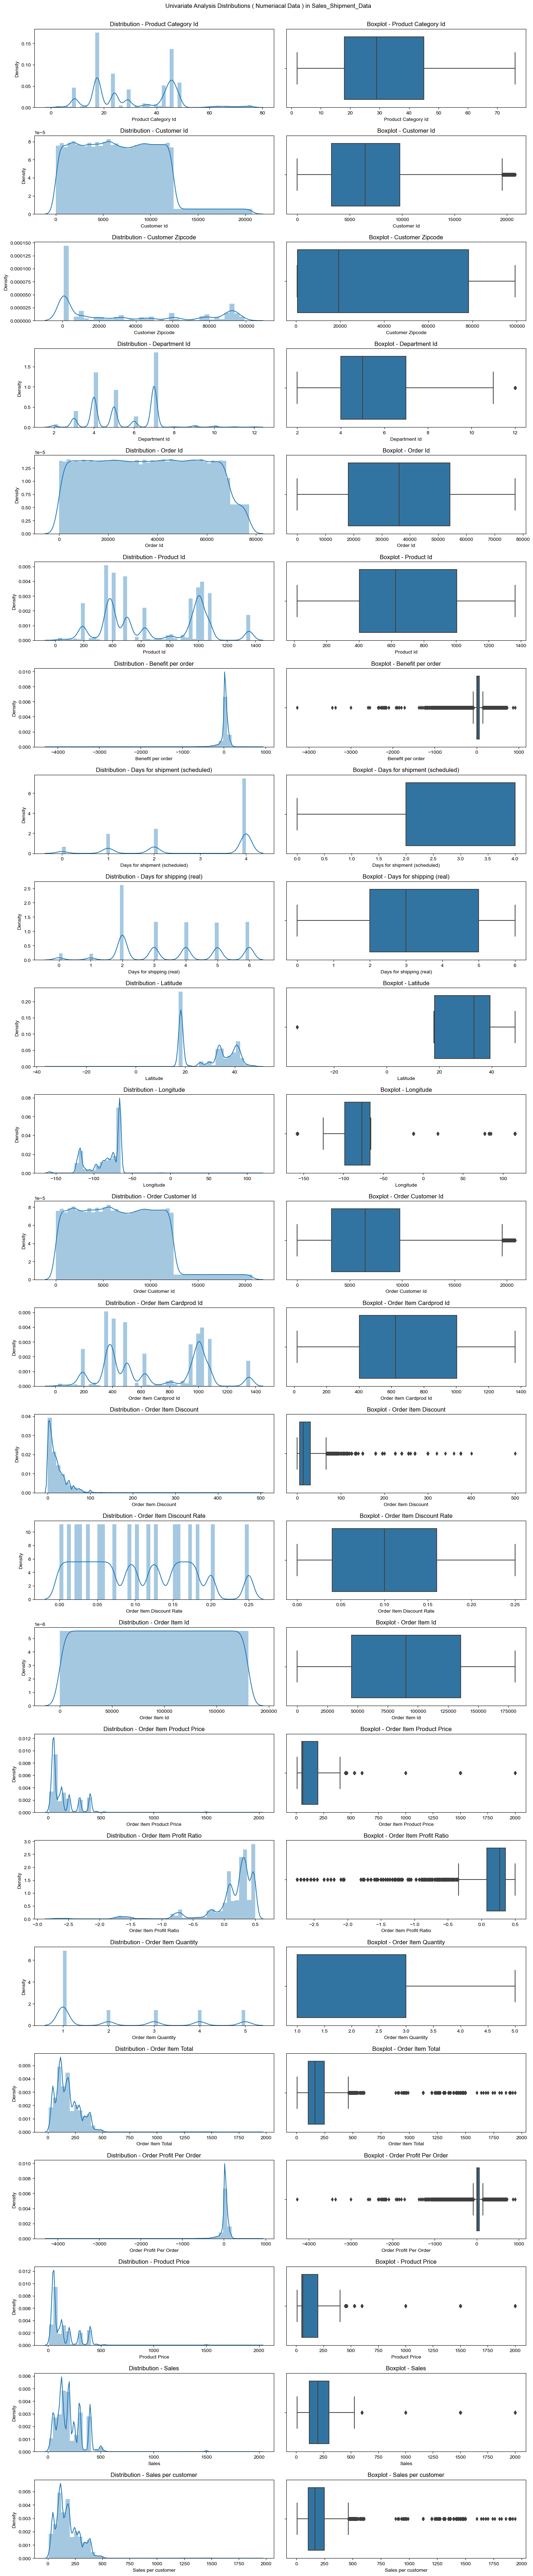

In [42]:
# for multiple plots
fig, axes =plt.subplots(nrows=len(numerical_columns), ncols=2,figsize=(15, 3* len(numerical_columns)))

for i ,column in enumerate(numerical_columns):
    
    sns.distplot(dfss1[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution - {column}')
    
    sns.boxplot(x=dfss1[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column}')


fig.suptitle('Univariate Analysis Distributions ( Numeriacal Data ) in Sales_Shipment_Data',y=1)

# For better visualization
sns.set(style="dark")
plt.tight_layout()
plt.show()

2. For Categorical datatypes columns

In [43]:
categorical_columns = dfss1.select_dtypes(include=['object']).columns

In [44]:
dfss1.select_dtypes(include=['object']).head()

Category Name                           Class    Customer City  \
0  Women's Apparel  Moderate Value-Moderate Number          Roswell   
1  Women's Apparel  Moderate Value-Moderate Number      Los Angeles   
2  Women's Apparel  Moderate Value-Moderate Number           Harvey   
3  Women's Apparel  Moderate Value-Moderate Number         Elmhurst   
4  Women's Apparel  Moderate Value-Moderate Number  North Las Vegas   

  Customer Country Customer Fname Customer Lname Customer Segment  \
0          EE. UU.           Jean           Dunn        Corporate   
1          EE. UU.           Rose          White        Corporate   
2          EE. UU.         Joshua          Brady        Corporate   
3          EE. UU.           Mary          Smith        Corporate   
4          EE. UU.       Samantha          Kline        Corporate   

  Customer State            Customer Street Delivery Status  ...  \
0             NM    8837 Blue Hills Harbour            Late  ...   
1             CA  1396 Silver Berry Impasse            Late  ...   
2             IL   8414 Wishing Horse Acres            Late  ...   
3             IL             1269 Tawny Key            Late  ...   
4             NV     6396 Blue Gate Parkway            Late  ...   

             Order City Order Country order date (DateOrders)  \
0               Tlalpan        México         2/26/2017 17:17   
1             Soyapango   El Salvador          2/27/2015 0:47   
2               Managua     Nicaragua          1/29/2017 4:43   
3  Poza Rica de Hidalgo        México          1/18/2015 4:42   
4        San Pedro Sula      Honduras         3/28/2017 17:36   

      Order Region       Order State     Order Status  \
0  Central America  Distrito Federal  Pending Payment   
1  Central America      San Salvador  Pending Payment   
2  Central America           Managua   Payment Review   
3  Central America          Veracruz  Pending Payment   
4  Central America            Cortés  Pending Payment   

                           Product Name shipping date (DateOrders)  \
0  Nike Men's Dri-FIT Victory Golf Polo             03/02/17 17:17   
1  Nike Men's Dri-FIT Victory Golf Polo              03/03/15 0:47   
2  Nike Men's Dri-FIT Victory Golf Polo              02/03/17 4:43   
3  Nike Men's Dri-FIT Victory Golf Polo             1/23/2015 4:42   
4  Nike Men's Dri-FIT Victory Golf Polo             04/02/17 17:36   

  Shipping Mode     Type  
0  Second Class  PAYMENT  
1  Second Class  PAYMENT  
2  Second Class  PAYMENT  
3  Second Class  PAYMENT  
4  Second Class  PAYMENT  

[5 rows x 22 columns]

NOTE: we dont want following columns for EDA as no relevent importand info is there to see as per analysis.
* ['Customer City','Customer Fname', 
'Customer State','Category Name','Customer Lname','Customer Street',
'order date (DateOrders)','Product Name','shipping date (DateOrders)',
'Order City', 'Order State','Order Country']


In [45]:
categorical_columns_selected = categorical_columns.difference(['Customer City','Customer Fname', 
                                     'Customer State','Category Name','Customer Lname','Customer Street',
                                     'order date (DateOrders)','Product Name','shipping date (DateOrders)',
                                         'Order City', 'Order State','Order Country'])

In [46]:
categorical_columns_selected

Index(['Class', 'Customer Country', 'Customer Segment', 'Delivery Status',
       'Department Name', 'Market', 'Order Region', 'Order Status',
       'Shipping Mode', 'Type'],
      dtype='object')

In [47]:
list(enumerate(categorical_columns_selected))

[(0, 'Class'),
 (1, 'Customer Country'),
 (2, 'Customer Segment'),
 (3, 'Delivery Status'),
 (4, 'Department Name'),
 (5, 'Market'),
 (6, 'Order Region'),
 (7, 'Order Status'),
 (8, 'Shipping Mode'),
 (9, 'Type')]

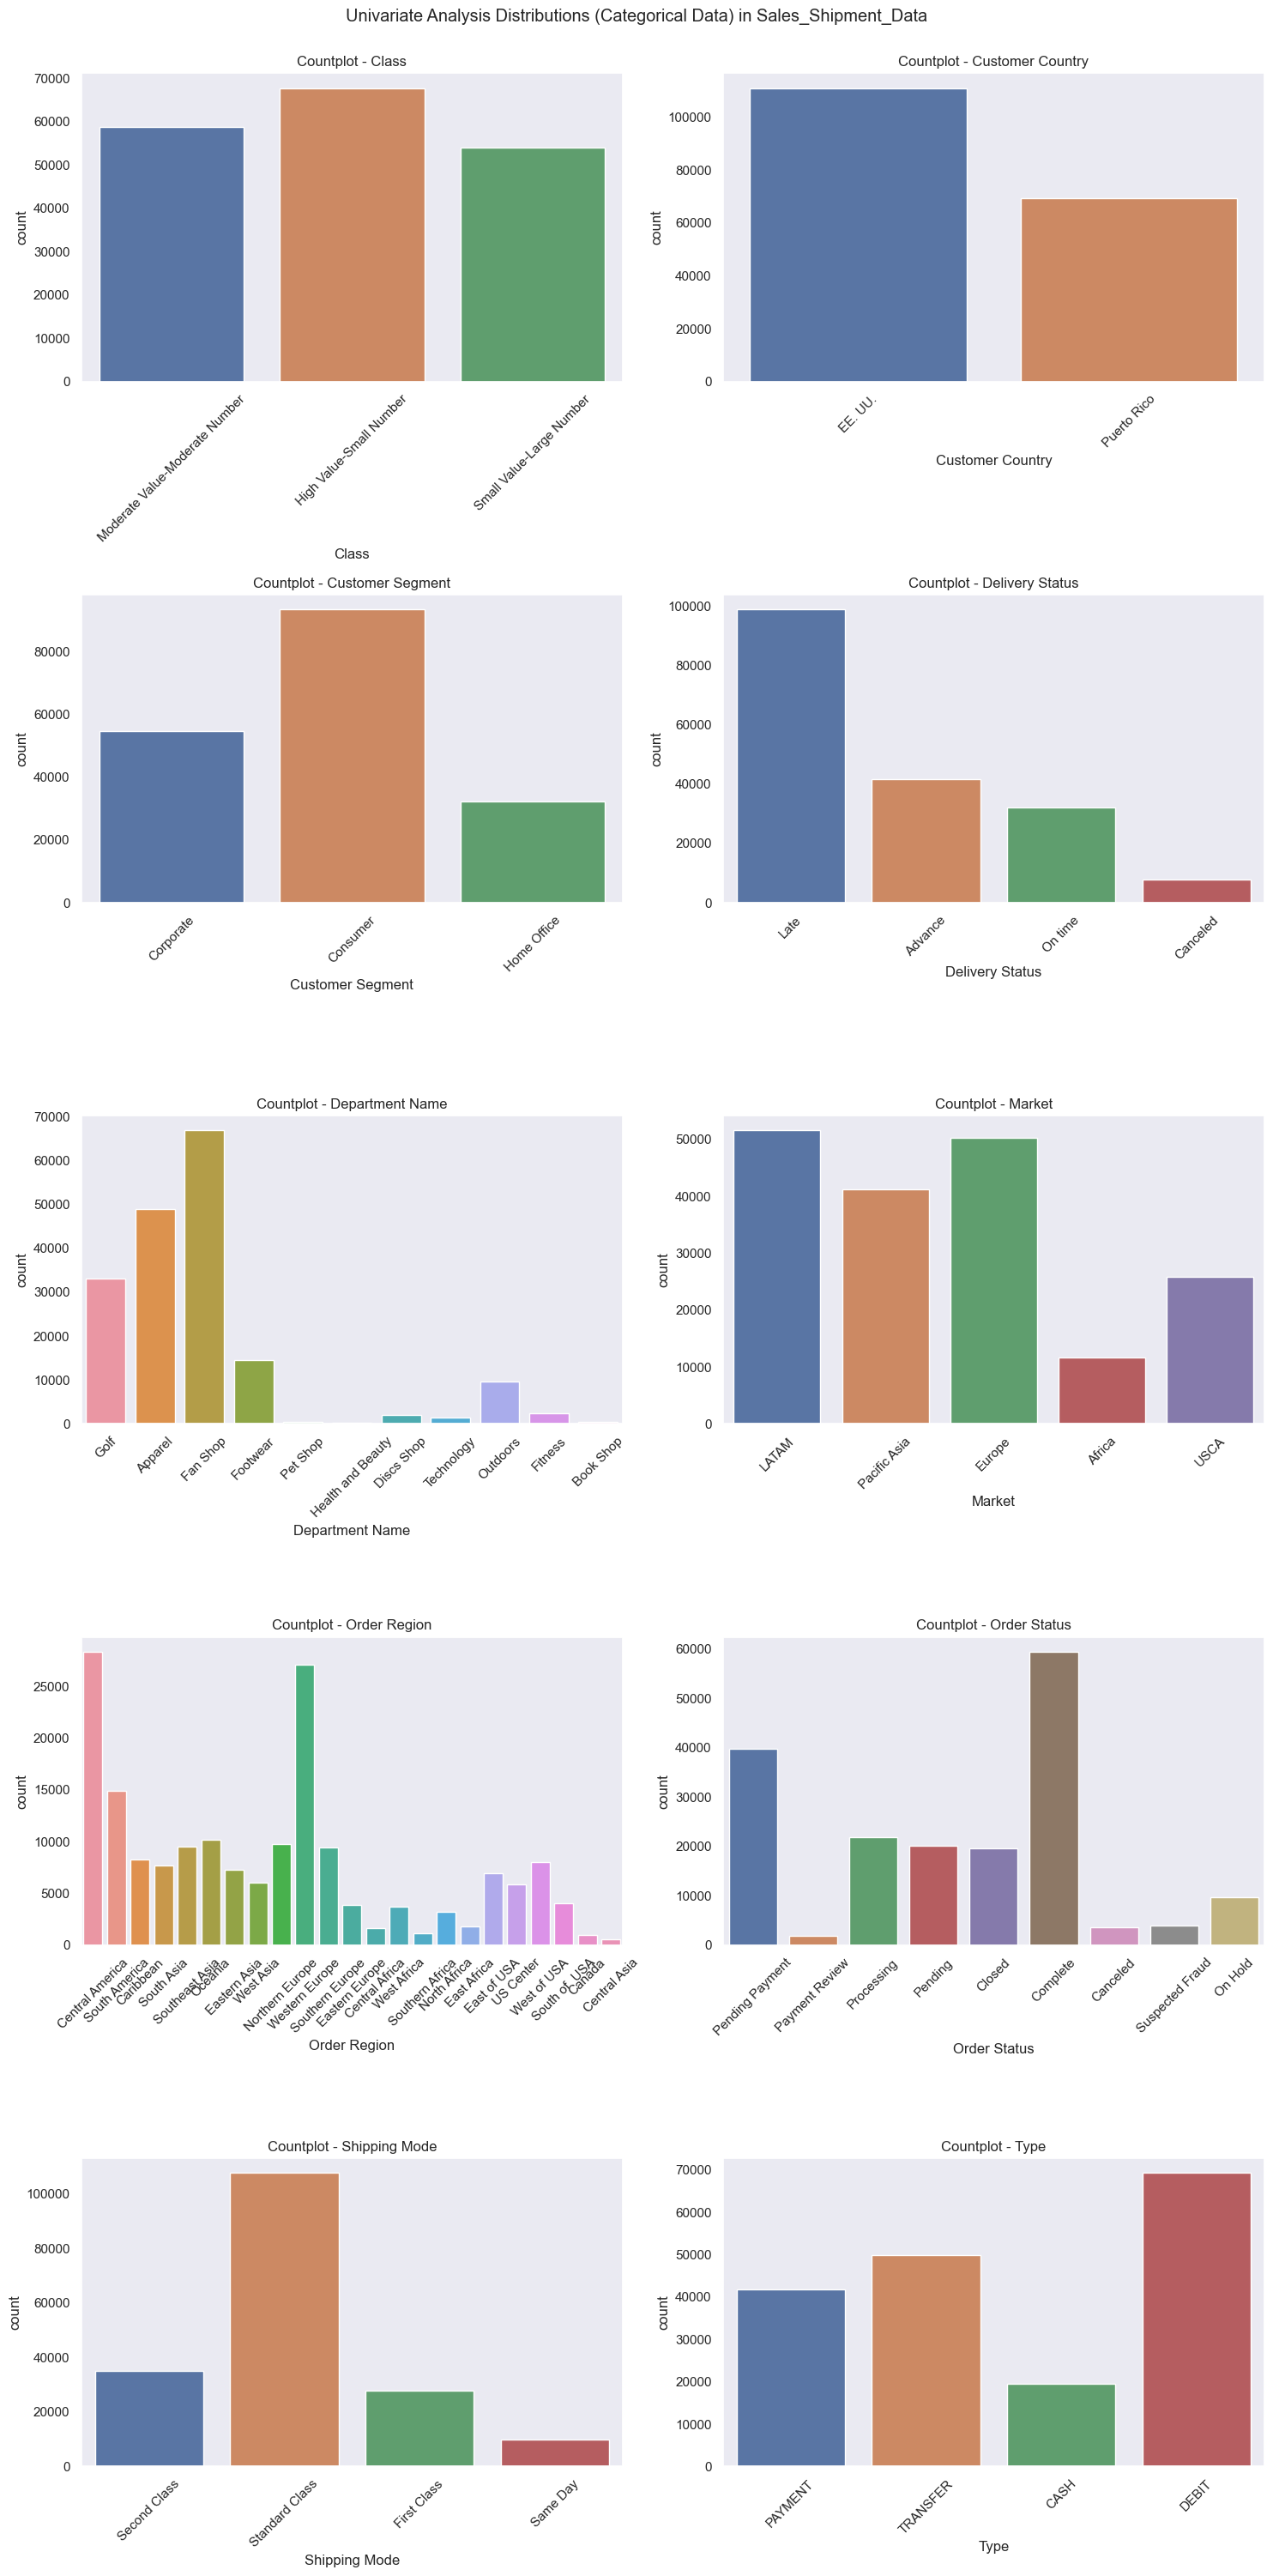

In [48]:
n_cols=2
n_rows=len(categorical_columns_selected)//n_cols  # 10//2=5
fig, axes =plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15, 3* len(categorical_columns_selected)))

for i ,column in enumerate(categorical_columns_selected):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(x=dfss1[column],ax=ax)
    ax.set_title(f'Countplot - {column}')
    ax.tick_params(axis='x', rotation=45)
    
fig.suptitle('Univariate Analysis Distributions (Categorical Data) in Sales_Shipment_Data',y=1)
sns.set(style="dark")
plt.tight_layout()
plt.show()

B. For Inventory Stock :

In [49]:
dfis1.describe().T  #for Numerical Data

count        mean         std   min    25%    50%     75%  \
product id     118.0  689.576271  403.120380  19.0  303.5  729.0  905.75   
avg lead time  118.0   10.000000    0.000000  10.0   10.0   10.0   10.00   
avg order qty  118.0    2.084746    1.000652   1.0    1.0    3.0    3.00   
current stock  118.0  160.720339  115.003819  35.0   63.0  175.0  321.00   
max lead time  118.0   30.000000    0.000000  30.0   30.0   30.0   30.00   
max order qty  118.0    3.169492    2.001303   1.0    1.0    5.0    5.00   
mod            118.0    0.542373    0.500326   0.0    0.0    1.0    1.00   
reorder point  118.0  110.932203   70.045617  35.0   35.0  175.0  175.00   
safety stock   118.0   90.330508   60.270055  25.0   25.0  144.0  146.00   

                  max  
product id     1363.0  
avg lead time    10.0  
avg order qty     3.0  
current stock   330.0  
max lead time    30.0  
max order qty     5.0  
mod               1.0  
reorder point   175.0  
safety stock    148.0

In [50]:
dfis1.describe(include='object').T 

count unique                                      top freq
order-now      118      2                                    green   64
product name   118    118  Nike Men's Fingertrap Max Training Shoe    1

Univariate Analysis: 

1. For Numerical Datatype columns

In [51]:
numerical_columns_inventory = dfis1.select_dtypes(include=['number']).columns 

In [52]:
list(enumerate(numerical_columns_inventory))  

[(0, 'product id'),
 (1, 'avg lead time'),
 (2, 'avg order qty'),
 (3, 'current stock'),
 (4, 'max lead time'),
 (5, 'max order qty'),
 (6, 'mod'),
 (7, 'reorder point'),
 (8, 'safety stock')]

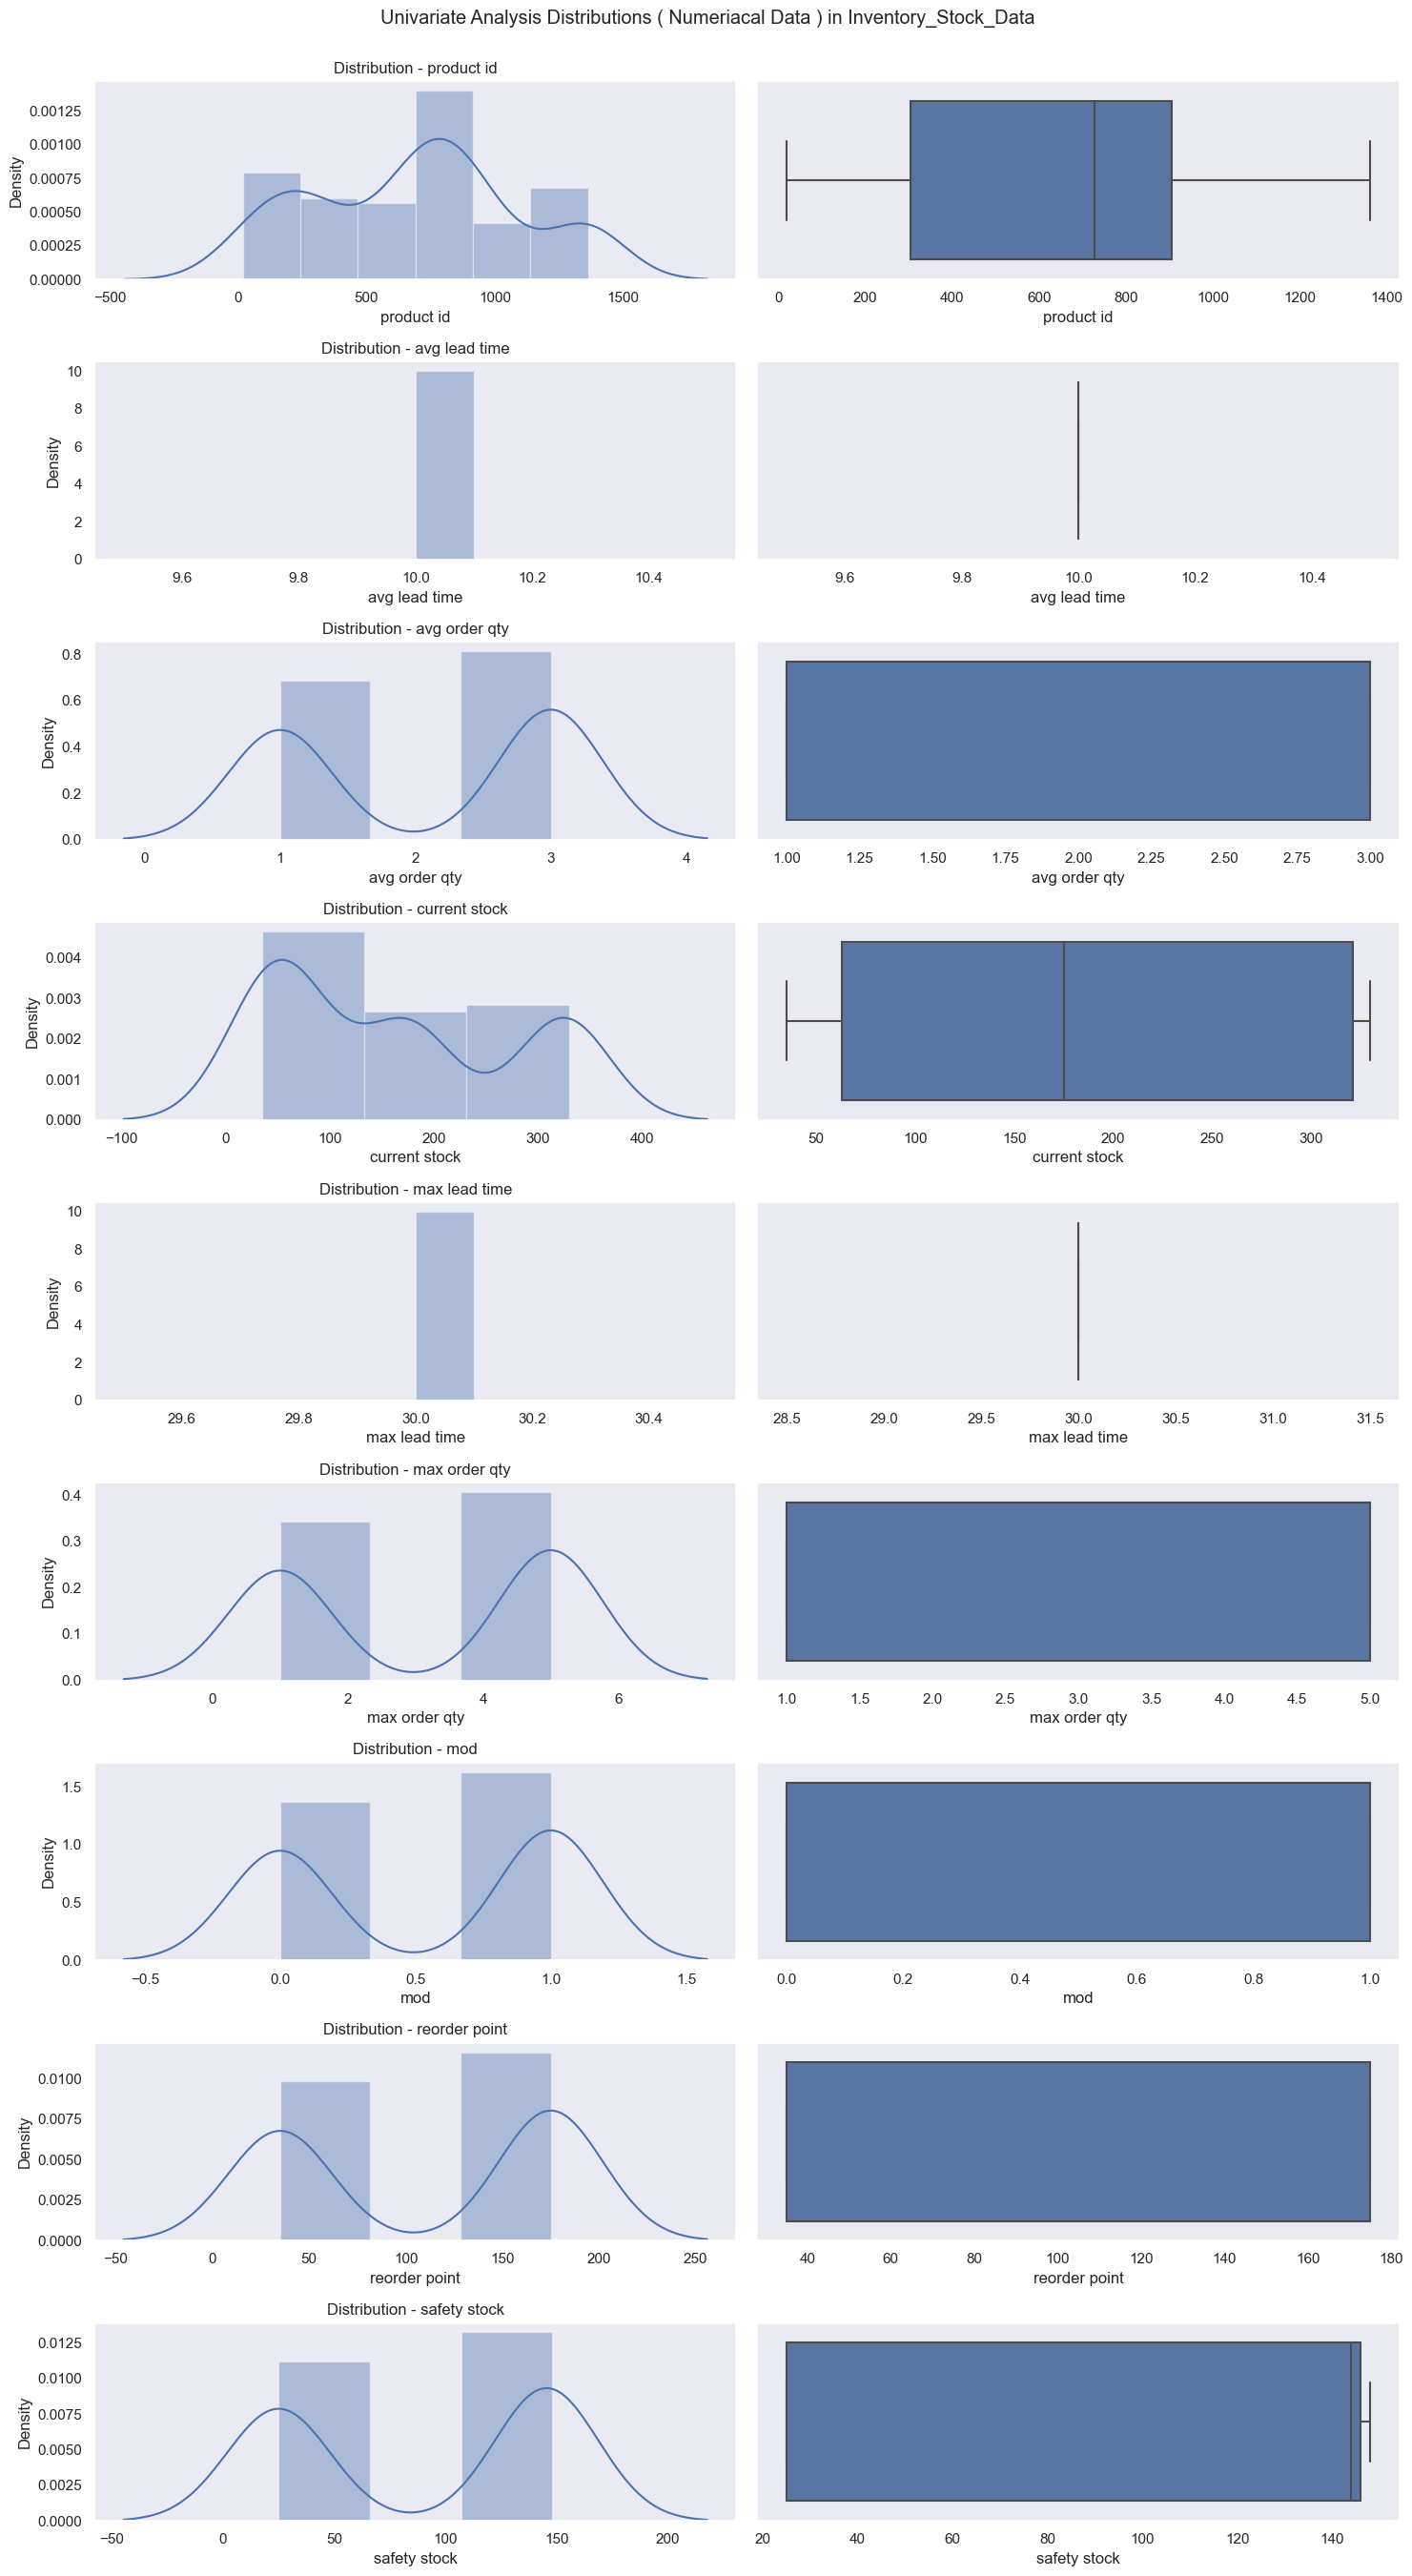

In [53]:
fig, axes =plt.subplots(nrows=len(numerical_columns_inventory), ncols=2,figsize=(15, 3* len(numerical_columns_inventory)))

for i ,column in enumerate(numerical_columns_inventory):
    
    sns.distplot(dfis1[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution - {column}')
    
    sns.boxplot(x=dfis1[column], ax=axes[i, 1])
    ax.set_title(f'Boxplot - {column}')


fig.suptitle('Univariate Analysis Distributions ( Numeriacal Data ) in Inventory_Stock_Data',y=1)

# For better visualization
sns.set(style="dark")
plt.tight_layout()
plt.show()

2. For Categorical datatypes columns

In [54]:
categorical_columns_inventory = dfis1.select_dtypes(include=['object']).columns

In [55]:
list(enumerate(categorical_columns_inventory))

[(0, 'order-now'), (1, 'product name')]

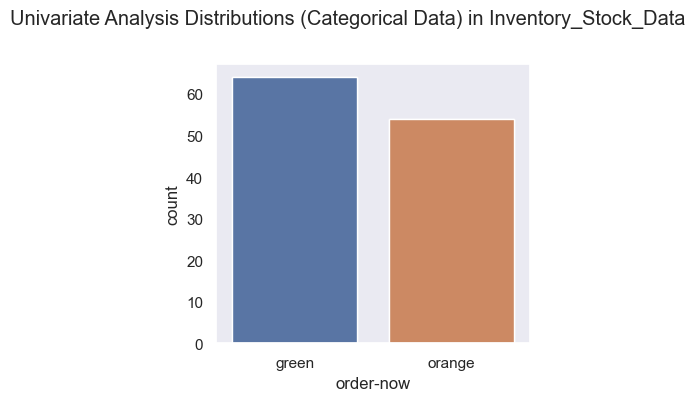

In [56]:
fig, axes =plt.subplots(nrows=1, ncols=1,figsize=(4,4))

for i ,column in enumerate(categorical_columns_inventory):
    sns.countplot(x=dfis1['order-now'])
    ax.set_title(f'Countplot - {column}')
    
fig.suptitle('Univariate Analysis Distributions (Categorical Data) in Inventory_Stock_Data',y=1)
sns.set(style="dark")
plt.tight_layout()
plt.show()

Bivariate Analysis:

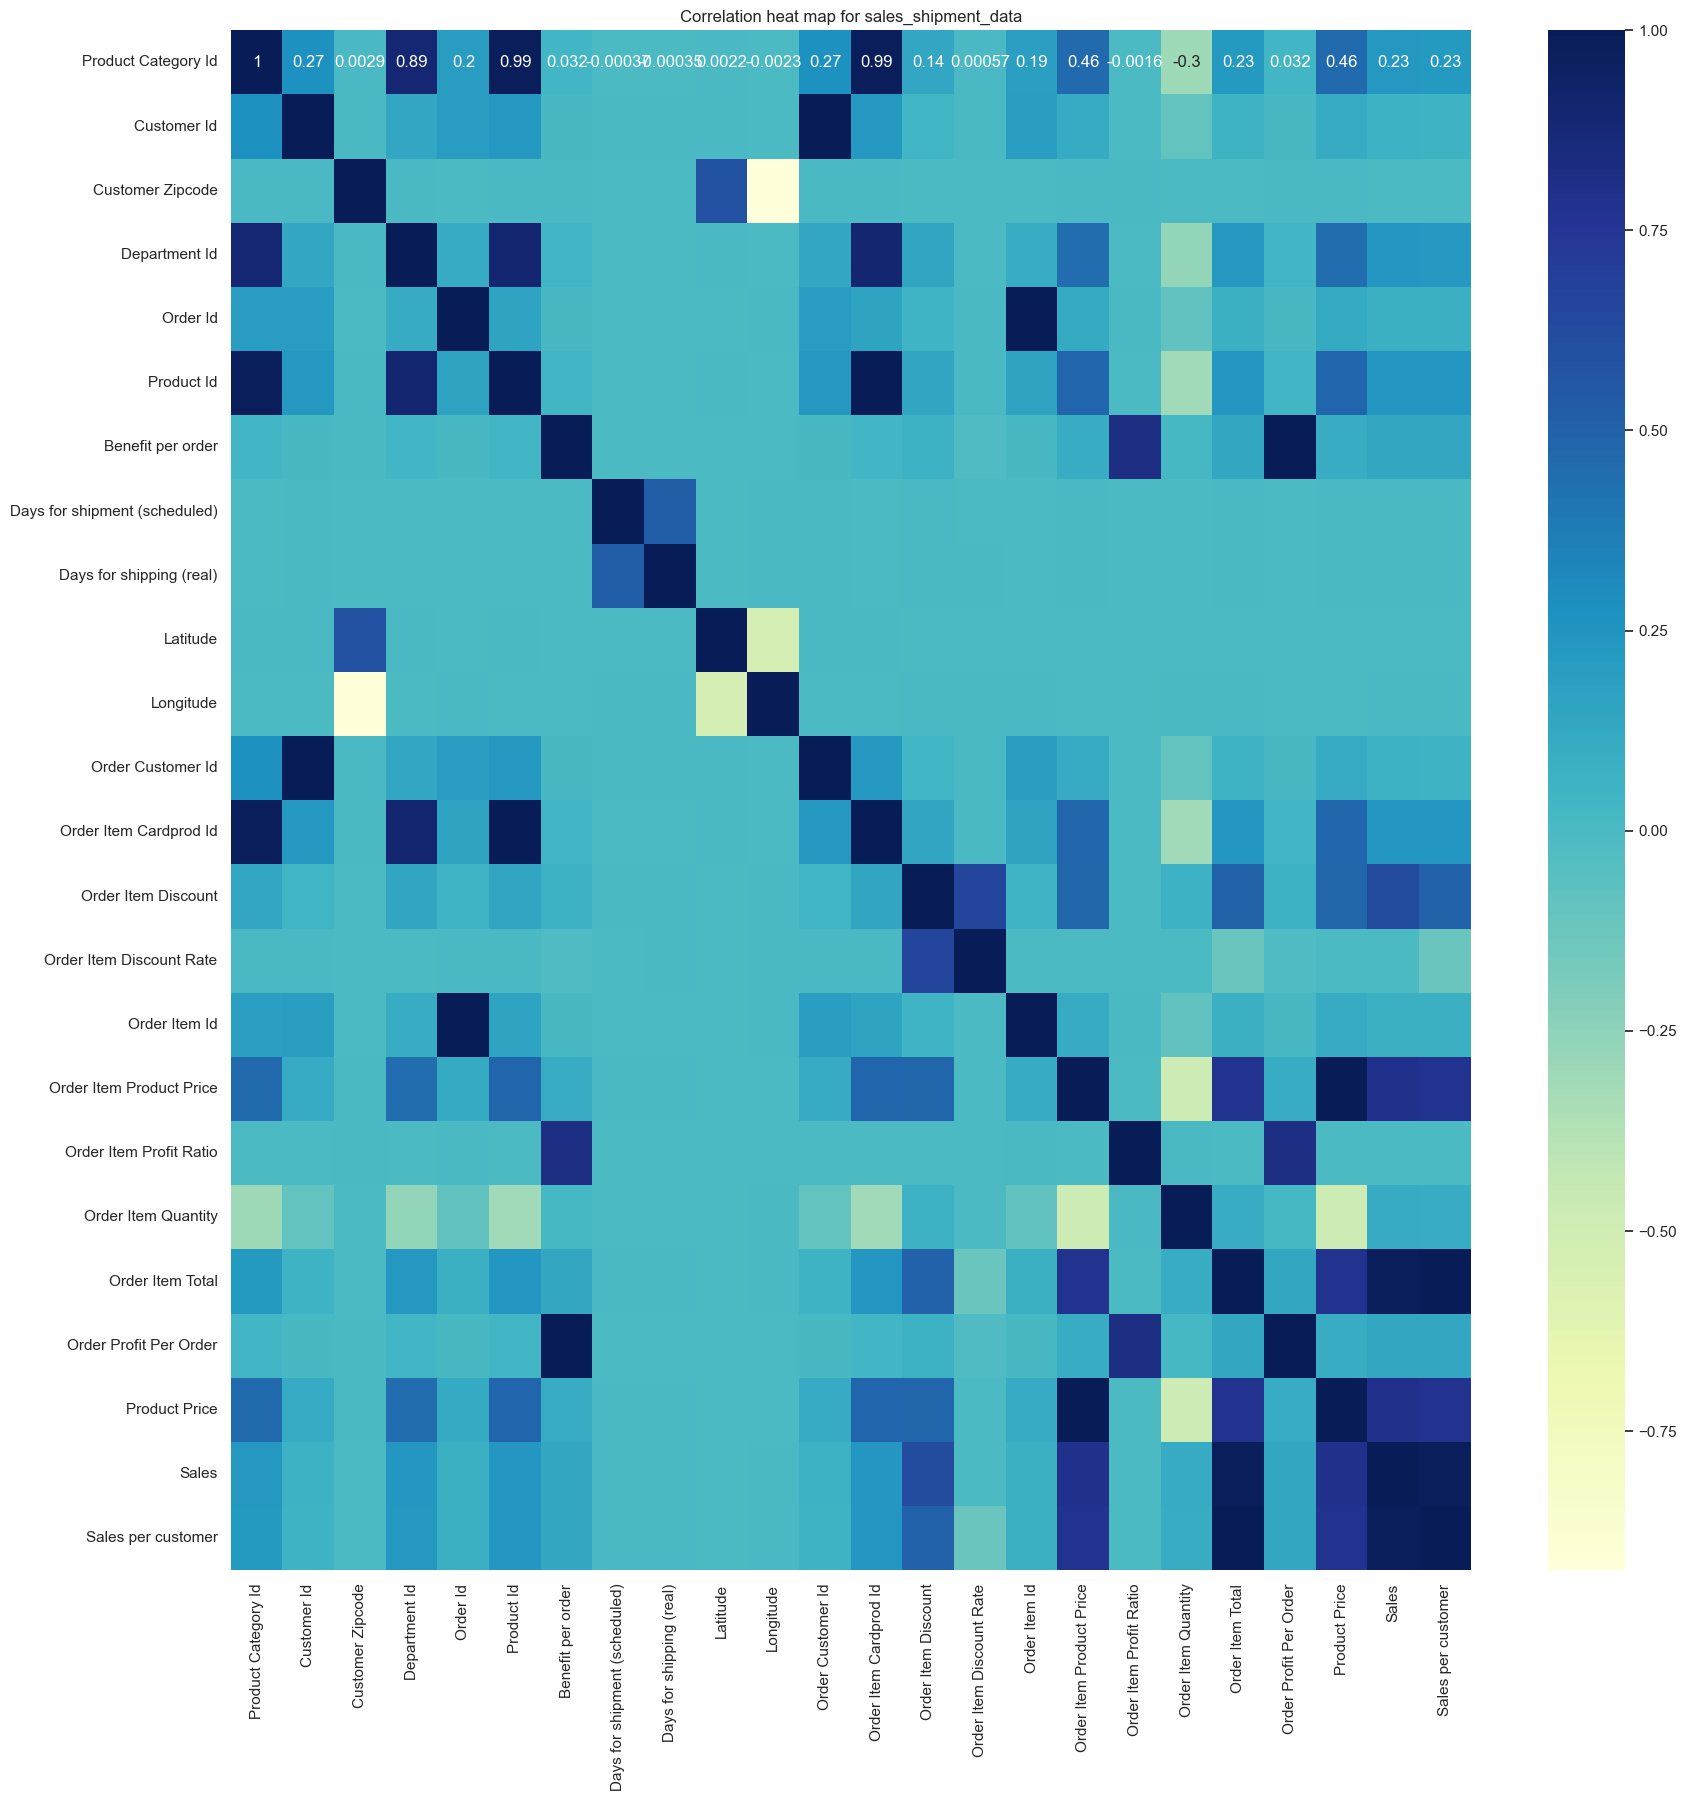

In [57]:
plt.figure(figsize=(20,20))
htmp = sns.heatmap(dfss1.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')
htmp.set_title('Correlation heat map for sales_shipment_data')
plt.show()

<Figure size 2500x1000 with 0 Axes>

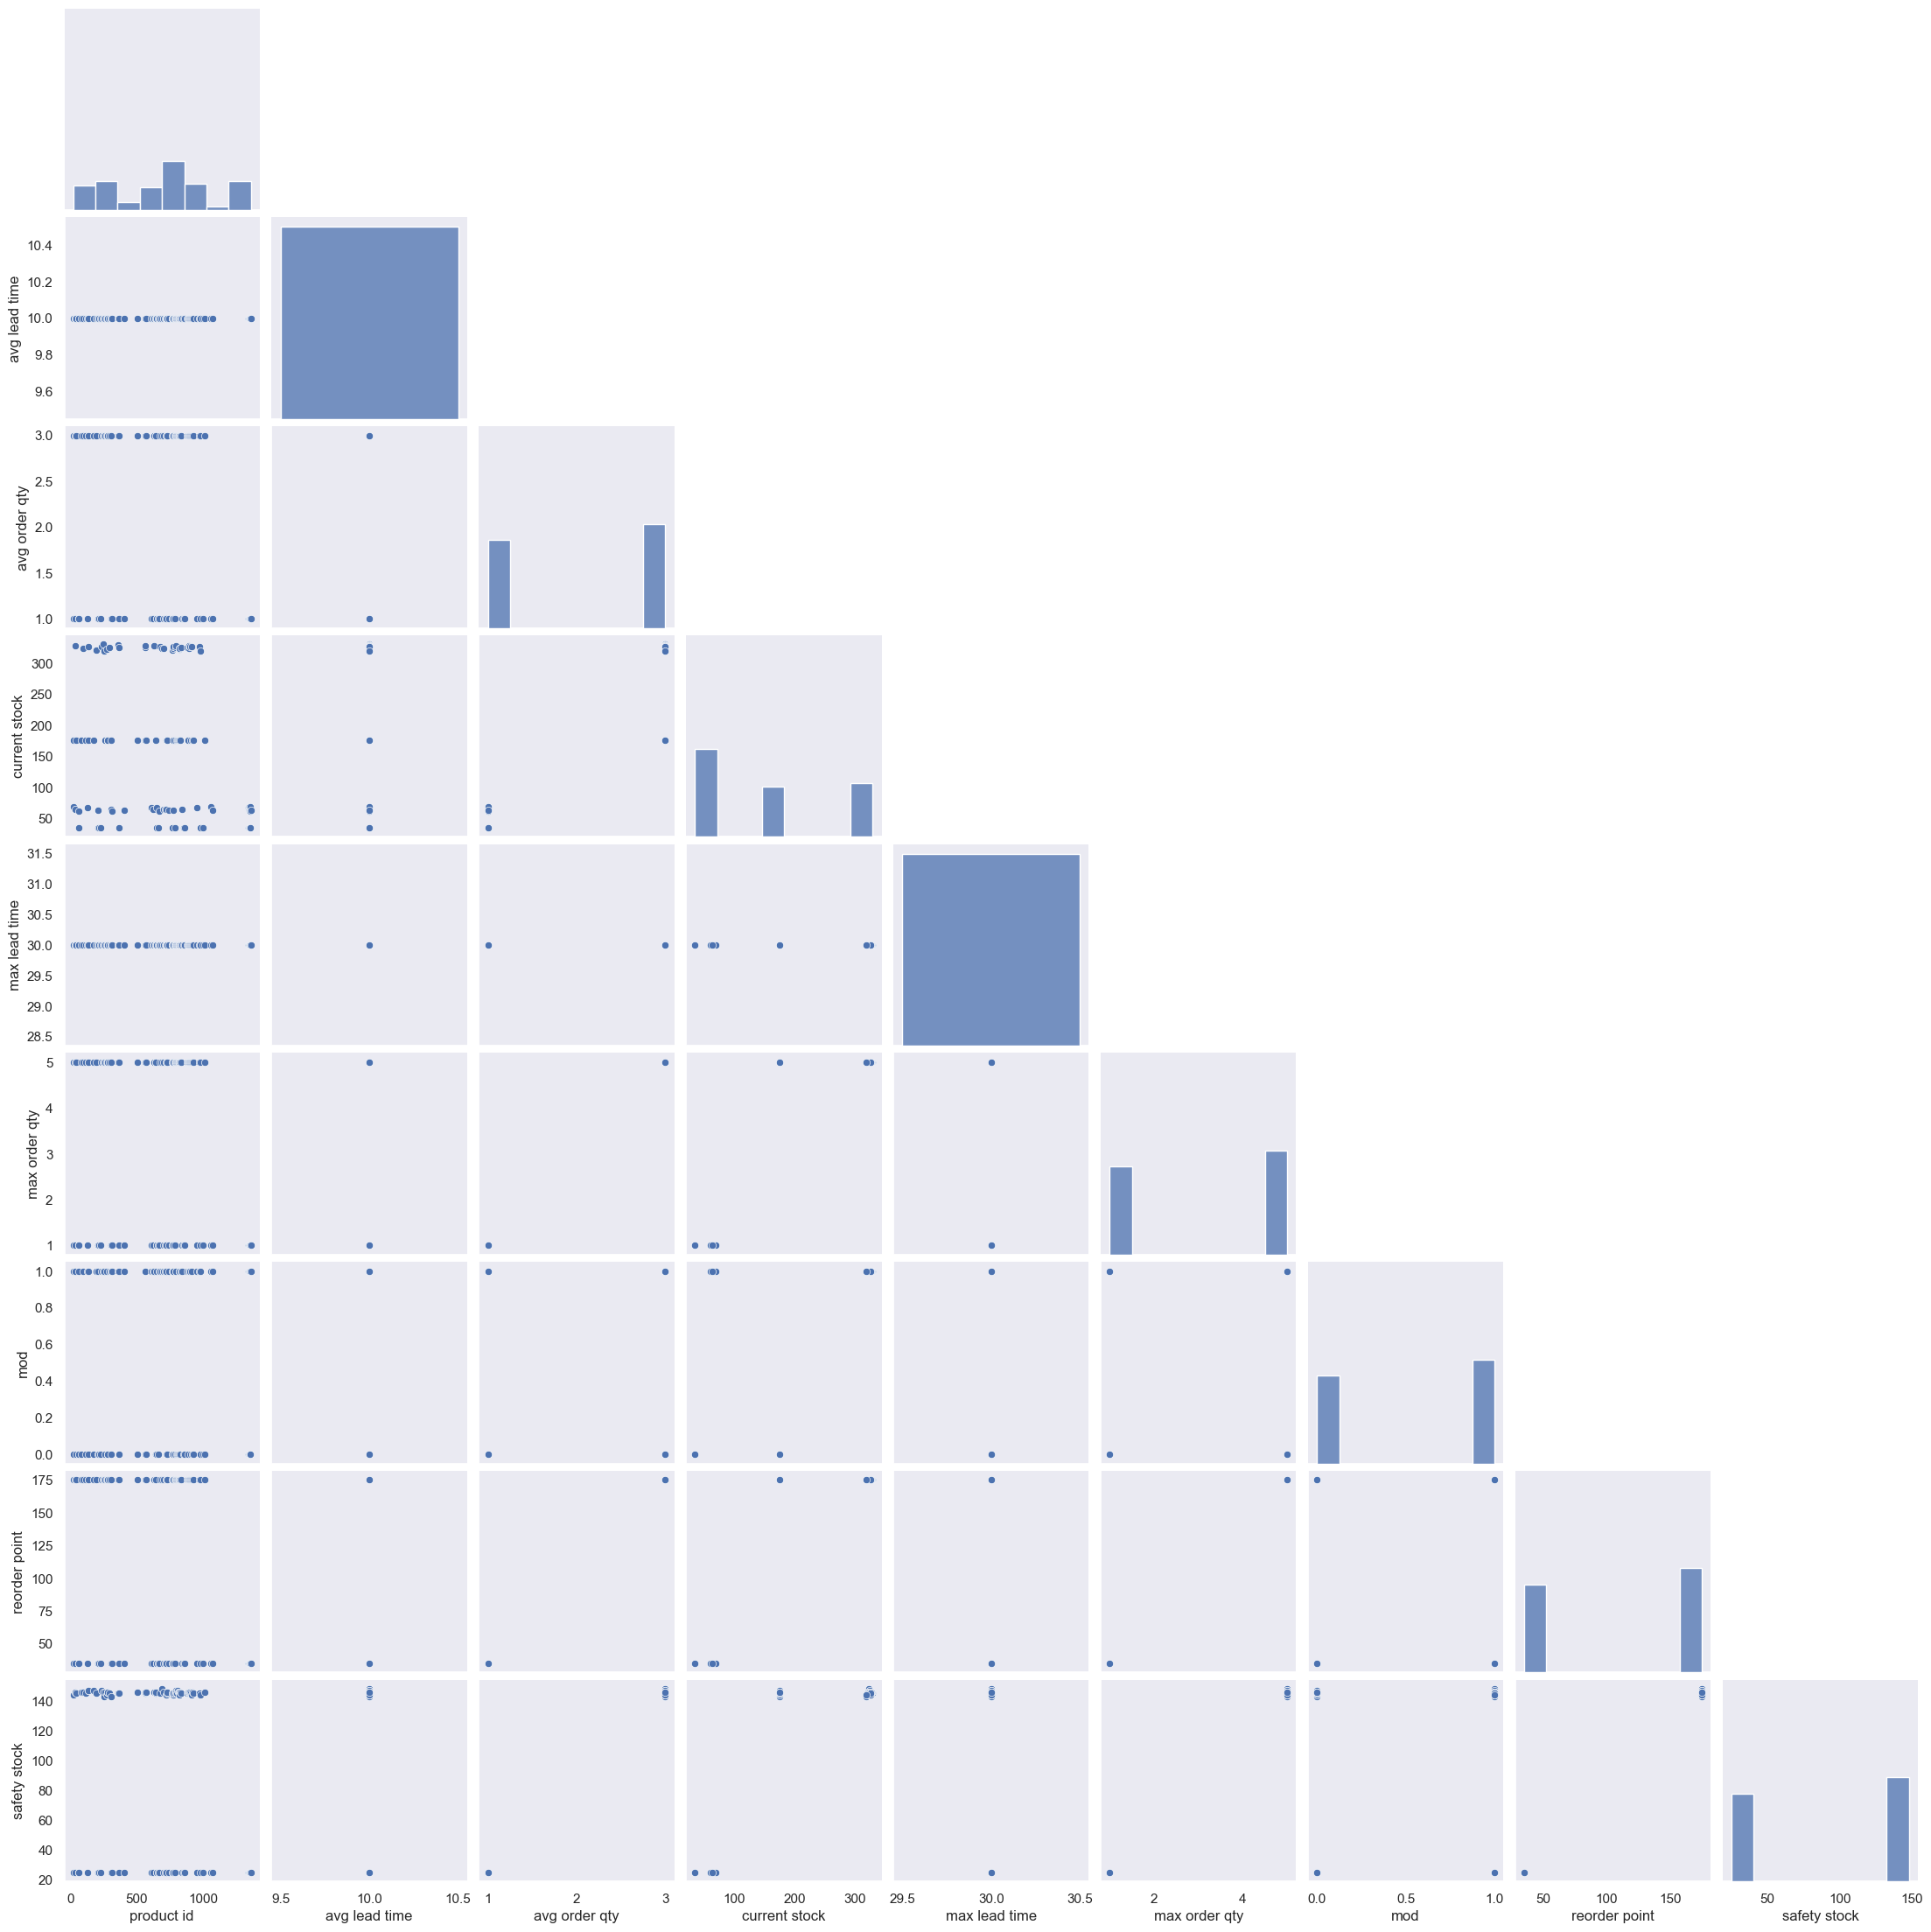

In [58]:
plt.figure(figsize=(25,10))
sns.pairplot(dfis1.select_dtypes(include=['number']),corner=True)
plt.show()

# Data Preparation:

1.For Sales Shipment :

# 1.Treating dtypes: 

# A
dtype to change:

11  Customer Zipcode               180519 non-null  float64  -----> int64

# B
* 18  order date (DateOrders)        180519 non-null  object
* 25  shipping date (DateOrders)     180519 non-null  object

to date-time format.

In [59]:
dfss1['Customer Zipcode']=dfss1['Customer Zipcode'].astype('int64')

In [60]:
print(dfss1['Customer Zipcode'].dtype)

int64


In [61]:
dfss1['order date (DateOrders)'] = pd.to_datetime(dfss1['order date (DateOrders)'], format='mixed')

In [62]:
dfss1['shipping date (DateOrders)'] = pd.to_datetime(dfss1['shipping date (DateOrders)'],format='mixed')

In [63]:
dfss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product Category Id            180519 non-null  int64         
 1   Category Name                  180519 non-null  object        
 2   Class                          180519 non-null  object        
 3   Customer City                  180519 non-null  object        
 4   Customer Country               180519 non-null  object        
 5   Customer Fname                 180519 non-null  object        
 6   Customer Id                    180519 non-null  int64         
 7   Customer Lname                 180519 non-null  object        
 8   Customer Segment               180519 non-null  object        
 9   Customer State                 180519 non-null  object        
 10  Customer Street                180519 non-null  object        
 11  

# 2.Changing name of certain columns:

26  Type                           180519 non-null  object

In [64]:
dfss1=dfss1.rename(columns={'Type':'Payment_Mode'})

In [65]:
dfss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product Category Id            180519 non-null  int64         
 1   Category Name                  180519 non-null  object        
 2   Class                          180519 non-null  object        
 3   Customer City                  180519 non-null  object        
 4   Customer Country               180519 non-null  object        
 5   Customer Fname                 180519 non-null  object        
 6   Customer Id                    180519 non-null  int64         
 7   Customer Lname                 180519 non-null  object        
 8   Customer Segment               180519 non-null  object        
 9   Customer State                 180519 non-null  object        
 10  Customer Street                180519 non-null  object        
 11  

# 3. Adding new Flag variable ( Late Delivery Risk):

* Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) 
* (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)

In [66]:
dfss1[['Days for shipping (real)','Days for shipment (scheduled)']].head()

Days for shipping (real)  Days for shipment (scheduled)
0                         4                              2
1                         4                              2
2                         5                              2
3                         5                              2
4                         5                              2

In [67]:
print(dfss1.columns)

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Payment_Mode',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer'],
      dtype

In [68]:
dfss1["delay"] = dfss1["Days for shipping (real)"] - dfss1["Days for shipment (scheduled)"] # created a new column Delay.

In [69]:
# UDF for late_delivery_risk 
threshold = 2  # delay limmit, can be changed !
def is_late(delay):
    """
To classify delays based on a threshold. 
Can be used into other codebase for handling delays in shipments.
 """
    if delay > threshold:   # show LATE ,if delayed by more than 2 days
        return "Late"
    else:
        return "Not Late"

In [70]:
dfss1["Late_delivery_risk"] = dfss1["delay"].apply(is_late) # created a new column late_delivery_risk.

In [71]:
dfss1.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Payment_Mode',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer', 'delay', 'La

In [72]:
dfss1.head()

Product Category Id    Category Name                           Class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     Customer City Customer Country Customer Fname  Customer Id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  Customer Lname Customer Segment Customer State  ...  \
0           Dunn        Corporate             NM  ...   
1          White        Corporate             CA  ...   
2          Brady        Corporate             IL  ...   
3          Smith        Corporate             IL  ...   
4          Kline        Corporate             NV  ...   

  Order Item Product Price  Order Item Profit Ratio Order Item Quantity  \
0                     50.0                     0.11                   2   
1                     50.0                     0.11                   2   
2                     50.0                     0.33                   2   
3                     50.0                     0.29                   2   
4                     50.0                     0.50                   2   

   Order Item Total Order Profit Per Order Product Price  Sales  \
0              85.0               9.610000          50.0  100.0   
1              84.0               9.490000          50.0  100.0   
2              94.5              30.709999          50.0  100.0   
3              95.0              27.549999          50.0  100.0   
4              95.0              47.500000          50.0  100.0   

  Sales per customer delay  Late_delivery_risk  
0               85.0     2            Not Late  
1               84.0     2            Not Late  
2               94.5     3                Late  
3               95.0     3                Late  
4               95.0     3                Late  

[5 rows x 48 columns]

In [73]:
dfss1[['Days for shipping (real)','Days for shipment (scheduled)','Delivery Status','delay','Late_delivery_risk']].head(300)

Days for shipping (real)  Days for shipment (scheduled) Delivery Status  \
0                           4                              2            Late   
1                           4                              2            Late   
2                           5                              2            Late   
3                           5                              2            Late   
4                           5                              2            Late   
..                        ...                            ...             ...   
295                         2                              1            Late   
296                         3                              2            Late   
297                         2                              1            Late   
298                         6                              2        Canceled   
299                         5                              2            Late   

     delay Late_delivery_risk  
0        2           Not Late  
1        2           Not Late  
2        3               Late  
3        3               Late  
4        3               Late  
..     ...                ...  
295      1           Not Late  
296      1           Not Late  
297      1           Not Late  
298      4               Late  
299      3               Late  

[300 rows x 5 columns]

# 4. Rename the variables as per python naming convensions:

1. For Sales Shipment :

In [74]:
dfss1.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Payment_Mode',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer', 'delay', 'La

In [75]:
#UDF : For Renaming
def rename_column(col_name):
  """
  To converts a column name to lowercase and replaces spaces with underscores.
  """
  new_name1=col_name.lower()
  new_name2=new_name1.replace(" ", "_")
  return new_name2

In [76]:
dfss1.columns = [rename_column(col_name) for col_name in dfss1.columns]

In [77]:
dfss1.columns

Index(['product_category_id', 'category_name', 'class', 'customer_city',
       'customer_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'delivery_status', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_date_(dateorders)', 'order_id', 'order_region', 'order_state',
       'order_status', 'product_id', 'product_name',
       'shipping_date_(dateorders)', 'shipping_mode', 'payment_mode',
       'benefit_per_order', 'days_for_shipment_(scheduled)',
       'days_for_shipping_(real)', 'latitude', 'longitude',
       'order_customer_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'order_item_total',
       'order_profit_per_order', 'product_price', 'sales',
       'sales_per_customer', 'delay', 'la

2. For Inventory Stock :

In [78]:
dfis1.columns

Index(['order-now', 'product id', 'product name', 'avg lead time',
       'avg order qty', 'current stock', 'max lead time', 'max order qty',
       'mod', 'reorder point', 'safety stock'],
      dtype='object')

In [79]:
dfis1.columns = [rename_column(col_name) for col_name in dfis1.columns]

In [80]:
dfis1.columns

Index(['order-now', 'product_id', 'product_name', 'avg_lead_time',
       'avg_order_qty', 'current_stock', 'max_lead_time', 'max_order_qty',
       'mod', 'reorder_point', 'safety_stock'],
      dtype='object')

# 5. Merging both given tables

In [81]:
df_inventory=pd.merge(left=dfss1, right=dfis1,left_on='product_id', right_on='product_id',how='left')

In [82]:
dfi=df_inventory.copy(deep=True)

In [83]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

In [84]:
dfi.isna().sum()

product_category_id              0
category_name                    0
class                            0
customer_city                    0
customer_country                 0
customer_fname                   0
customer_id                      0
customer_lname                   0
customer_segment                 0
customer_state                   0
customer_street                  0
customer_zipcode                 0
delivery_status                  0
department_id                    0
department_name                  0
market                           0
order_city                       0
order_country                    0
order_date_(dateorders)          0
order_id                         0
order_region                     0
order_state                      0
order_status                     0
product_id                       0
product_name_x                   0
shipping_date_(dateorders)       0
shipping_mode                    0
payment_mode                     0
benefit_per_order   

# 6. Creating columns for week, month, year, and quarter:

on the basis of ORDER DATES.

In [85]:
dfi['week'] = dfi['order_date_(dateorders)'].dt.isocalendar().week
dfi['month'] = dfi['order_date_(dateorders)'].dt.month
dfi['year'] = dfi['order_date_(dateorders)'].dt.year
dfi['quarter'] = dfi['order_date_(dateorders)'].dt.quarter

In [86]:
dfi.columns

Index(['product_category_id', 'category_name', 'class', 'customer_city',
       'customer_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'delivery_status', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_date_(dateorders)', 'order_id', 'order_region', 'order_state',
       'order_status', 'product_id', 'product_name_x',
       'shipping_date_(dateorders)', 'shipping_mode', 'payment_mode',
       'benefit_per_order', 'days_for_shipment_(scheduled)',
       'days_for_shipping_(real)', 'latitude', 'longitude',
       'order_customer_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'order_item_total',
       'order_profit_per_order', 'product_price', 'sales',
       'sales_per_customer', 'delay', '

# Understanding about Dataset and Oservations and Treatments so far:

1. Data present - Categorical and Numerical
2. Issues in data - NaN values present
3. Data Quality - good
4. Inaccuracy- present
5. Data type mismatch - present
6. Variable Name - changed as per python convention
7. EDA - univariate and Bivariate 

# Analaysis

In [87]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

Metrics 

In [88]:
total_sale_value = dfi['sales'].sum()
print(f'total_sale_value : {total_sale_value:.2f}')

total_sale_value : 36784735.01


In [89]:
total_sale_units = dfi['order_item_quantity'].sum()
print(f'total_sale_units : {total_sale_units}')

total_sale_units : 384079


In [90]:
inventory_value = dfi['current_stock'] * dfi['product_price']
total_inventory_value = inventory_value.sum()
print(f'total_inventory_value : {total_inventory_value:.2f}')

total_inventory_value : 2536160997.45


In [91]:
total_inventory_quantity = dfi['current_stock'].sum()
print(f'total_inventory_quantity : {total_inventory_quantity}')

total_inventory_quantity : 30378127


In [92]:
total_profit_value = dfi['order_profit_per_order'].sum()
print(f'total_profit_value: {total_profit_value:.2f}')

total_profit_value: 3966902.97


In [93]:
distinct_products = dfi['product_id'].nunique()
print(f'distinct_products: {distinct_products}')

distinct_products: 118


In [94]:
distinct_categories = dfi['category_name'].nunique()
print(f'distinct_categories: {distinct_categories}')

distinct_categories: 50


In [95]:
distinct_customers = dfi['customer_id'].nunique()
print(f'distinct_customers: {distinct_customers}')

distinct_customers: 20652


Number of orders by current status

In [96]:
# Count orders by status
order_status_counts = dfi['order_status'].value_counts()

# Print the results
print("Number of orders by current status")
print(order_status_counts)

Number of orders by current status
order_status
Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: count, dtype: int64


In [97]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(x=order_status_counts.index,y=order_status_counts.values)
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Status")
plt.xticks(rotation=60)
plt.show()

Number of orders by each type of delivery status

In [98]:
delivery_status_counts = dfi['delivery_status'].value_counts()

print("Number of orders by delivery status")
print(delivery_status_counts)

Number of orders by delivery status
delivery_status
Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: count, dtype: int64


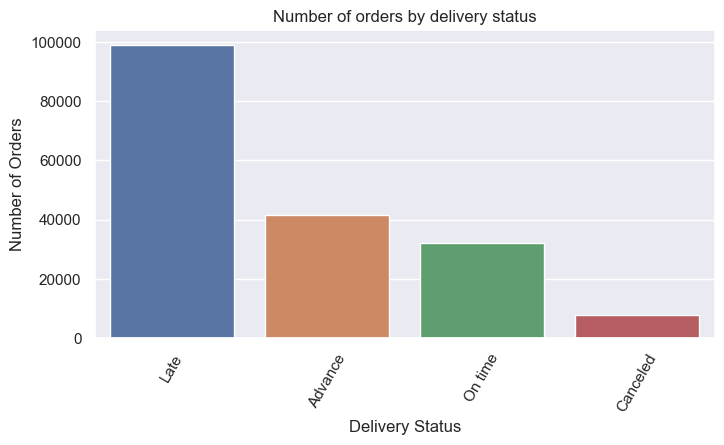

In [99]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(x=delivery_status_counts.index,y=delivery_status_counts.values)
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.title("Number of orders by delivery status")
plt.xticks(rotation=60)
plt.show()

Late Delivery Risk by time 

In [100]:
late_delivery_risk_by_year = dfi.groupby('year')['late_delivery_risk'].value_counts()
print(late_delivery_risk_by_year)

year  late_delivery_risk
2015  Not Late              57686
      Late                   4964
2016  Not Late              57744
      Late                   4806
2017  Not Late              49106
      Late                   4090
2018  Not Late               1948
      Late                    175
Name: count, dtype: int64


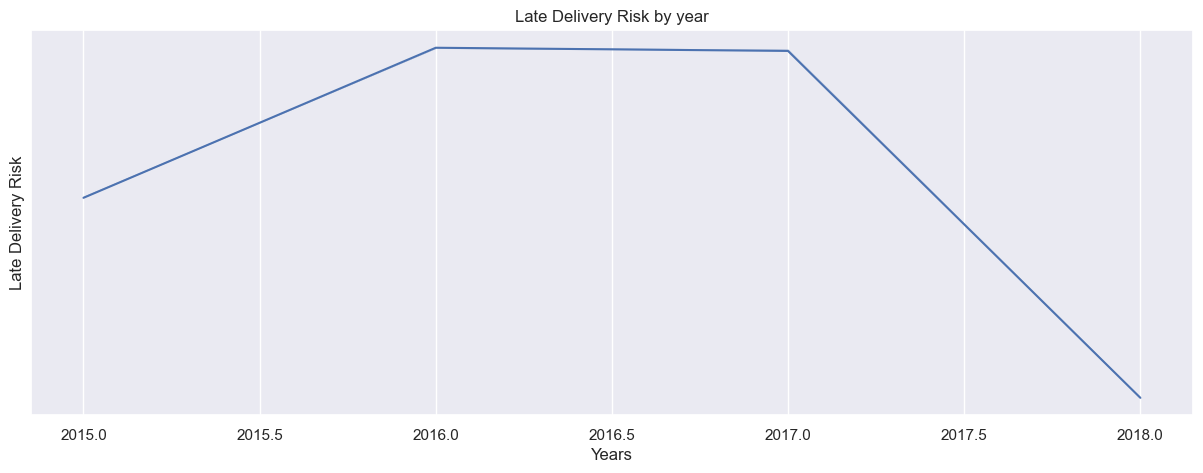

In [101]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.lineplot(dfi,x='year',y='late_delivery_risk',ci=False,markers=True,)
plt.xlabel("Years")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by year")
plt.show()

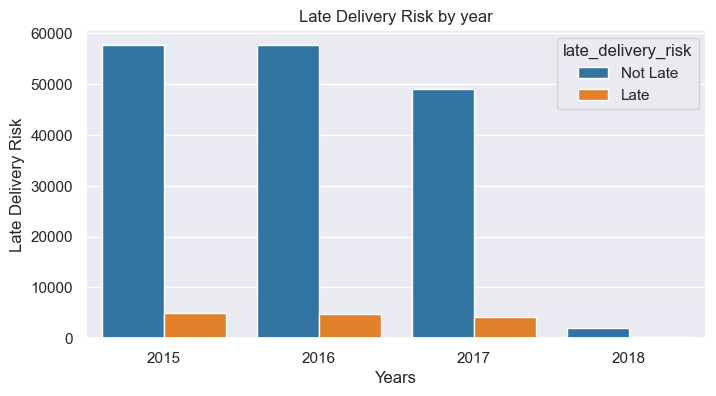

In [102]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.countplot(dfi,x='year',hue='late_delivery_risk',palette='tab10')
plt.xlabel("Years")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by year")
plt.show()

In [103]:
late_delivery_risk_by_quarter = dfi.groupby('quarter')['late_delivery_risk'].value_counts()
print(late_delivery_risk_by_quarter)

quarter  late_delivery_risk
1        Not Late              44585
         Late                   3842
2        Not Late              43048
         Late                   3502
3        Not Late              43585
         Late                   3738
4        Not Late              35266
         Late                   2953
Name: count, dtype: int64


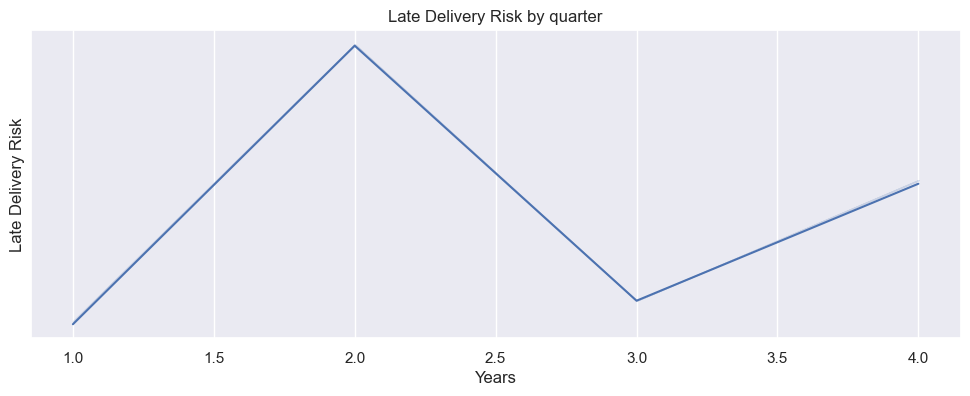

In [104]:
plt.figure(figsize=(12,4))
sns.set(style='darkgrid')
sns.lineplot(dfi,x='quarter',y='late_delivery_risk',ci=False,markers=True)
plt.xlabel("Years")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by quarter")
plt.show()

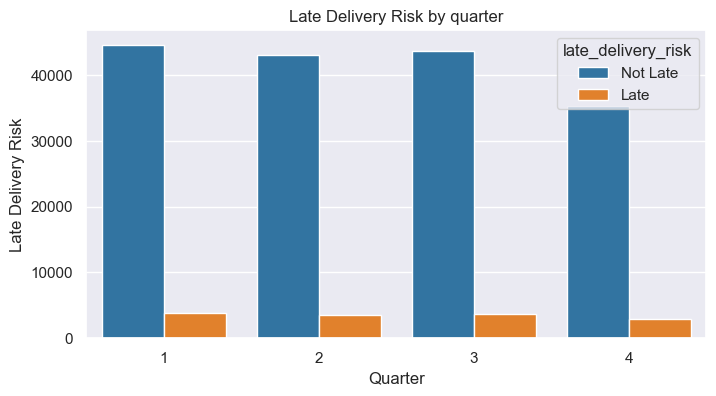

In [105]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.countplot(dfi,x='quarter',hue='late_delivery_risk',palette='tab10')
plt.xlabel("Quarter")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by quarter")
plt.show()

In [106]:
late_delivery_risk_by_month = dfi.groupby('month')['late_delivery_risk'].value_counts()
print(late_delivery_risk_by_month)

month  late_delivery_risk
1      Not Late              16584
       Late                   1395
2      Not Late              13351
       Late                   1178
3      Not Late              14650
       Late                   1269
4      Not Late              14226
       Late                   1209
5      Not Late              14871
       Late                   1105
6      Not Late              13951
       Late                   1188
7      Not Late              14665
       Late                   1257
8      Not Late              14584
       Late                   1328
9      Not Late              14336
       Late                   1153
10     Not Late              11985
       Late                    970
11     Not Late              11459
       Late                   1041
12     Not Late              11822
       Late                    942
Name: count, dtype: int64


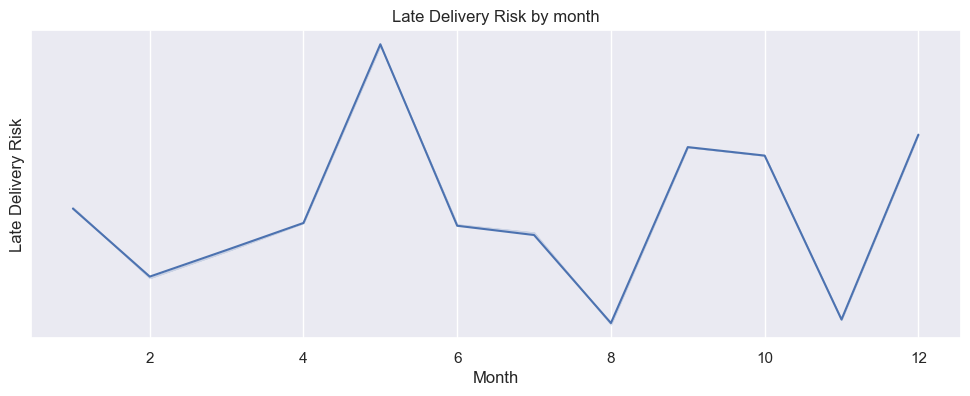

In [107]:
plt.figure(figsize=(12,4))
sns.set(style='darkgrid')
sns.lineplot(dfi,x='month',y='late_delivery_risk',ci=False,markers=True)
plt.xlabel("Month")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by month")
plt.show()

In [108]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.countplot(dfi,x='month',hue='late_delivery_risk',palette='tab10')
plt.xlabel("Month")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by month")
plt.show()

In [109]:
late_delivery_risk_by_week = dfi.groupby('week')['late_delivery_risk'].value_counts()
print(late_delivery_risk_by_week)

week  late_delivery_risk
1     Not Late              3272
      Late                   224
2     Not Late              3686
      Late                   327
3     Not Late              3758
                            ... 
51    Late                   217
52    Not Late              2713
      Late                   239
53    Not Late              1130
      Late                   104
Name: count, Length: 106, dtype: int64


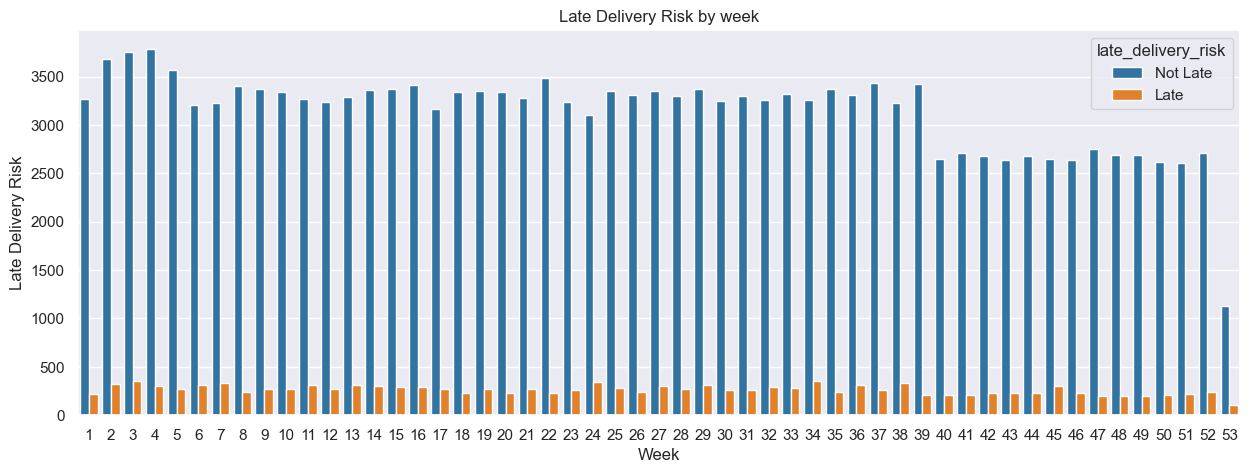

In [110]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.countplot(dfi,x='week',hue='late_delivery_risk',palette='tab10')
plt.xlabel("Week")
plt.ylabel("Late Delivery Risk")
plt.title("Late Delivery Risk by week")
plt.show()

Order Item Quantity Risk by time

In [111]:
Order_Item_Quantity_by_year = dfi.groupby('year')['order_item_quantity'].sum()
print(Order_Item_Quantity_by_year)

year
2015    138480
2016    137352
2017    106124
2018      2123
Name: order_item_quantity, dtype: int64


In [112]:
plt.figure(figsize=(6,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='year',y='order_item_quantity',palette='Set2')
plt.xlabel("Year")
plt.ylabel("Order Item Quantity")
plt.title("Order Item Quantity by year")
plt.show()

In [113]:
Order_Item_Quantity_by_quarter = dfi.groupby('quarter')['order_item_quantity'].sum()
print(Order_Item_Quantity_by_quarter )

quarter
1    104539
2    100627
3    102085
4     76828
Name: order_item_quantity, dtype: int64


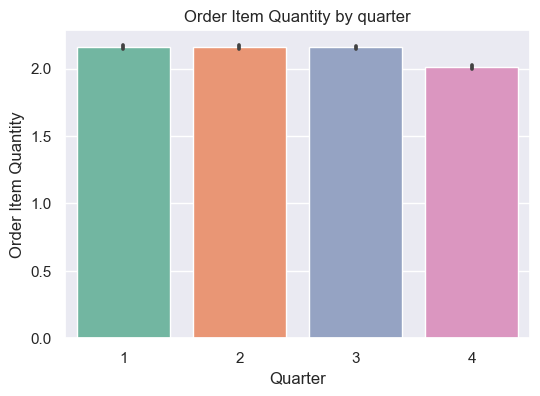

In [114]:
plt.figure(figsize=(6,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='quarter',y='order_item_quantity',palette='Set2')
plt.xlabel("Quarter")
plt.ylabel("Order Item Quantity")
plt.title("Order Item Quantity by quarter")
plt.show()

In [115]:
Order_Item_Quantity_by_month = dfi.groupby('month')['order_item_quantity'].sum()
print(Order_Item_Quantity_by_month)

month
1     37179
2     32273
3     35087
4     33684
5     34538
6     32405
7     34543
8     34390
9     33152
10    26129
11    25011
12    25688
Name: order_item_quantity, dtype: int64


In [116]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='month',y='order_item_quantity',palette='Set2')
plt.xlabel("Month")
plt.ylabel("Order Item Quantity")
plt.title("Order Item Quantity by month")
plt.show()

In [117]:
Order_Item_Quantity_by_week = dfi.groupby('week')['order_item_quantity'].sum()
print(Order_Item_Quantity_by_week)

week
1     7064
2     8200
3     8672
4     8540
5     8186
6     7812
7     7878
8     8163
9     8089
10    7951
11    7846
12    7672
13    7973
14    7979
15    7940
16    8247
17    7452
18    7715
19    7738
20    7792
21    7653
22    7999
23    7491
24    7204
25    7920
26    7654
27    7950
28    7765
29    7948
30    7540
31    7748
32    7653
33    7760
34    7672
35    7968
36    7753
37    7793
38    7650
39    7886
40    5682
41    5951
42    5810
43    5762
44    5761
45    5822
46    5821
47    5934
48    5773
49    5813
50    5670
51    5779
52    5938
53    2647
Name: order_item_quantity, dtype: int64


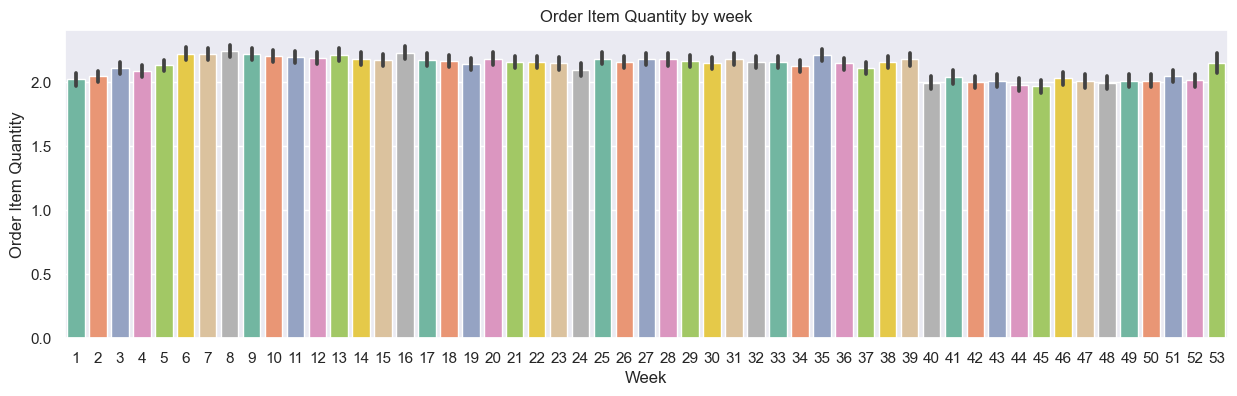

In [118]:
plt.figure(figsize=(15,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='week',y='order_item_quantity',palette='Set2')
plt.xlabel("Week")
plt.ylabel("Order Item Quantity")
plt.title("Order Item Quantity by week")
plt.show()

Order profit per order by time (by each week, month, year, quarter)

In [119]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

In [120]:
Order_Profit_by_year = dfi.groupby('year')['order_profit_per_order'].sum()
print(Order_Profit_by_year)

year
2015    1.318857e+06
2016    1.310119e+06
2017    1.304085e+06
2018    3.384189e+04
Name: order_profit_per_order, dtype: float64


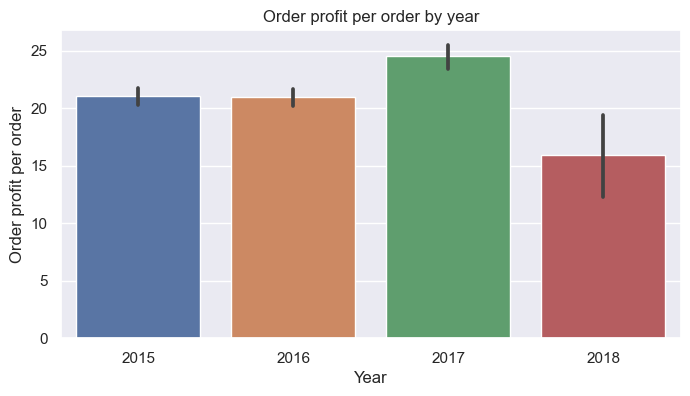

In [121]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='year',y='order_profit_per_order')
plt.xlabel("Year")
plt.ylabel("Order profit per order")
plt.title("Order profit per order by year")
plt.show()

In [122]:
Order_Profit_by_quarter = dfi.groupby('quarter')['order_profit_per_order'].sum()
print(Order_Profit_by_quarter)

quarter
1    1.001916e+06
2    1.001643e+06
3    1.068118e+06
4    8.952267e+05
Name: order_profit_per_order, dtype: float64


In [123]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='quarter',y='order_profit_per_order')
plt.xlabel("Quarter")
plt.ylabel("Order profit per order")
plt.title("Order profit per order by quarter")
plt.show()

In [124]:
Order_Profit_by_month = dfi.groupby('month')['order_profit_per_order'].sum()
print(Order_Profit_by_month)

month
1     367127.430615
2     301061.220935
3     333727.100652
4     339021.360056
5     337878.660269
6     324742.520726
7     348592.480100
8     360210.470630
9     359315.040248
10    331987.009971
11    281757.810287
12    281481.869563
Name: order_profit_per_order, dtype: float64


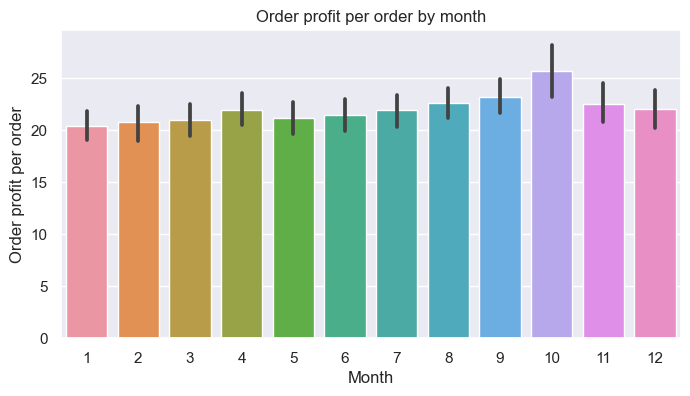

In [125]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='month',y='order_profit_per_order')
plt.xlabel("Month")
plt.ylabel("Order profit per order")
plt.title("Order profit per order by month")
plt.show()

In [126]:
Order_Profit_by_week = dfi.groupby('week')['order_profit_per_order'].sum()
print(Order_Profit_by_week)

week
1      92037.640254
2      75680.460163
3      74293.699870
4      72440.370232
5      84926.320370
6      83214.700180
7      61892.830302
8      76089.980144
9      82736.900161
10     62933.530158
11     65908.390260
12     83286.940264
13     84364.210016
14     78000.740090
15     78349.599966
16     83686.780154
17     77757.769773
18     78697.729911
19     71230.940119
20     72615.730148
21     72446.320007
22     84864.530157
23     81626.970136
24     78518.710236
25     77275.050220
26     62823.930167
27     81727.789996
28     78156.150048
29     87436.579998
30     70621.879872
31     80784.790057
32     78665.190171
33     84340.080072
34     85682.770231
35     76607.030206
36     84160.629993
37     84292.750000
38     86229.119914
39     86860.470257
40     41711.780176
41     71956.899827
42     64889.159919
43    102150.349782
44     78974.190341
45     65602.660032
46     71229.760316
47     64663.089832
48     65695.649932
49     50799.510097
50     58408.41

In [127]:
plt.figure(figsize=(15,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='week',y='order_profit_per_order')
plt.xlabel("Week")
plt.ylabel("Order profit per order")
plt.title("Order profit per order by week")
plt.show()

Inventory Units by each class or cluster

In [128]:
inventory_units_by_class = dfi.groupby('class')['current_stock'].sum()
print(inventory_units_by_class)

class
High Value-Small Number           13399842
Moderate Value-Moderate Number     6059123
Small Value-Large Number          10919162
Name: current_stock, dtype: int64


In [129]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='class',y='current_stock')
plt.xlabel("Class")
plt.ylabel("Current Stock")
plt.title("Inventory Units by each class")
plt.xticks(rotation=15)
plt.show()

Inventory Value by each class or cluster & Inventory by class

In [130]:
inventory_value = dfi['current_stock'] * dfi['product_price']
dfi['inventory_value'] = inventory_value

In [131]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

In [132]:
inventory_value_by_class = dfi.groupby('class')['inventory_value'].sum()
print(inventory_value_by_class)

class
High Value-Small Number           1.387021e+09
Moderate Value-Moderate Number    5.615272e+08
Small Value-Large Number          5.876127e+08
Name: inventory_value, dtype: float64


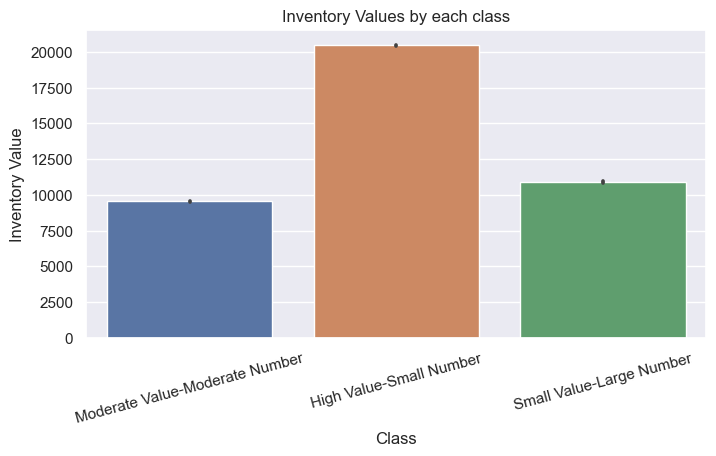

In [133]:
plt.figure(figsize=(8,4))
sns.set(style='darkgrid')
sns.barplot(dfi,x='class',y='inventory_value')
plt.xlabel("Class")
plt.ylabel("Inventory Value")
plt.title("Inventory Values by each class")
plt.xticks(rotation=15)
plt.show()

Detail Stock Action (products to be ordered, not required to ordered)

1. Products to be ordered

In [134]:
to_order = dfi['current_stock'] <= dfi['reorder_point']
dfi['to_order'] = to_order  

In [135]:
dfi.groupby(['product_id','product_name_x'])['to_order'].sum()

product_id  product_name_x                            
19          Nike Men's Fingertrap Max Training Shoe         0
24          Elevation Training Mask 2.0                    74
35          adidas Brazuca 2014 Official Match Ball         0
37          adidas Kids' F5 Messi FG Soccer Cleat           0
44          adidas Men's F10 Messi TRX FG Soccer Cleat    305
                                                         ... 
1359        Adult dog supplies                              0
1360        Smart watch                                   357
1361        Toys                                            0
1362        Fighting video games                          838
1363        Summer dresses                                  0
Name: to_order, Length: 118, dtype: int64

2. Products not required to ordered

In [136]:
not_to_order = dfi['current_stock'] > dfi['reorder_point']
dfi['not_to_order'] = not_to_order  

In [137]:
dfi.groupby(['product_id','product_name_x'])['not_to_order'].sum()

product_id  product_name_x                            
19          Nike Men's Fingertrap Max Training Shoe        64
24          Elevation Training Mask 2.0                     0
35          adidas Brazuca 2014 Official Match Ball        65
37          adidas Kids' F5 Messi FG Soccer Cleat         262
44          adidas Men's F10 Messi TRX FG Soccer Cleat      0
                                                         ... 
1359        Adult dog supplies                            492
1360        Smart watch                                     0
1361        Toys                                          529
1362        Fighting video games                            0
1363        Summer dresses                                650
Name: not_to_order, Length: 118, dtype: int64

In [138]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

In [139]:
dfi.head()

product_category_id    category_name                           class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     customer_city customer_country customer_fname  customer_id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  customer_lname customer_segment customer_state  ... mod  reorder_point  \
0           Dunn        Corporate             NM  ...   0            175   
1          White        Corporate             CA  ...   0            175   
2          Brady        Corporate             IL  ...   0            175   
3          Smith        Corporate             IL  ...   0            175   
4          Kline        Corporate             NV  ...   0            175   

  safety_stock  week month  year quarter inventory_value to_order  \
0          146     8     2  2017       1          8750.0     True   
1          146     9     2  2015       1          8750.0     True   
2          146     4     1  2017       1          8750.0     True   
3          146     3     1  2015       1          8750.0     True   
4          146    13     3  2017       1          8750.0     True   

   not_to_order  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 65 columns]

Product Order qty trend by time (by each week, month, year, quarter)

In [140]:
trend_year = dfi.groupby(['year', 'product_id', 'product_name_x'])['order_item_quantity'].sum()
print(trend_year)

year  product_id  product_name_x                            
2015  37          adidas Kids' F5 Messi FG Soccer Cleat         304
      44          adidas Men's F10 Messi TRX FG Soccer Cleat    406
      93          Under Armour Men's Tech II T-Shirt            348
      116         Nike Men's Comfort 2 Slide                    415
      134         Nike Women's Legend V-Neck T-Shirt            381
                                                               ... 
2018  1359        Adult dog supplies                            246
      1360        Smart watch                                   212
      1361        Toys                                          276
      1362        Fighting video games                          610
      1363        Summer dresses                                378
Name: order_item_quantity, Length: 236, dtype: int64


In [141]:
trend_quarter = dfi.groupby(['quarter', 'product_id', 'product_name_x'])['order_item_quantity'].sum()
print(trend_quarter)

quarter  product_id  product_name_x                            
1        37          adidas Kids' F5 Messi FG Soccer Cleat         242
         44          adidas Men's F10 Messi TRX FG Soccer Cleat    310
         93          Under Armour Men's Tech II T-Shirt            284
         116         Nike Men's Comfort 2 Slide                    332
         134         Nike Women's Legend V-Neck T-Shirt            218
                                                                  ... 
4        1359        Adult dog supplies                            246
         1360        Smart watch                                   145
         1361        Toys                                          253
         1362        Fighting video games                          228
         1363        Summer dresses                                272
Name: order_item_quantity, Length: 327, dtype: int64


In [142]:
trend_month = dfi.groupby(['month', 'product_id', 'product_name_x'])['order_item_quantity'].sum()
print(trend_month)

month  product_id  product_name_x                            
1      37          adidas Kids' F5 Messi FG Soccer Cleat          77
       44          adidas Men's F10 Messi TRX FG Soccer Cleat    101
       93          Under Armour Men's Tech II T-Shirt             93
       116         Nike Men's Comfort 2 Slide                    120
       134         Nike Women's Legend V-Neck T-Shirt             91
                                                                ... 
12     1359        Adult dog supplies                            119
       1360        Smart watch                                   145
       1361        Toys                                          253
       1362        Fighting video games                          228
       1363        Summer dresses                                272
Name: order_item_quantity, Length: 900, dtype: int64


In [143]:
trend_week = dfi.groupby(['week', 'product_id', 'product_name_x'])['order_item_quantity'].sum()
print(trend_week)

week  product_id  product_name_x                               
1     37          adidas Kids' F5 Messi FG Soccer Cleat             14
      44          adidas Men's F10 Messi TRX FG Soccer Cleat        11
      93          Under Armour Men's Tech II T-Shirt                15
      116         Nike Men's Comfort 2 Slide                        22
      134         Nike Women's Legend V-Neck T-Shirt                27
                                                                  ... 
53    957         Diamondback Women's Serene Classic Comfort Bi    108
      977         ENO Atlas Hammock Straps                           9
      1004        Field & Stream Sportsman 16 Gun Fire Safe        110
      1014        O'Brien Men's Neoprene Life Vest                 426
      1073        Pelican Sunstream 100 Kayak                      102
Name: order_item_quantity, Length: 3599, dtype: int64


Top 10 Most ordered products

In [144]:
dfi.groupby(['product_name_x'])['order_item_quantity'].sum().sort_values(ascending=False).head(10)

product_name_x
Perfect Fitness Perfect Rip Deck                 73698
Nike Men's Dri-FIT Victory Golf Polo             62956
O'Brien Men's Neoprene Life Vest                 57803
Nike Men's Free 5.0+ Running Shoe                36680
Under Armour Girls' Toddler Spine Surge Runni    31735
Nike Men's CJ Elite 2 TD Football Cleat          22246
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
ENO Atlas Hammock Straps                           998
Name: order_item_quantity, dtype: int64

Top 10 Most Categories

In [145]:
dfi.groupby(['category_name'])['order_item_quantity'].sum().nlargest(10)

category_name
Cleats                  73734
Women's Apparel         62956
Indoor/Outdoor Games    57803
Cardio Equipment        37587
Shop By Sport           32726
Men's Footwear          22246
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Electronics              9436
Name: order_item_quantity, dtype: int64

Top 10 cities interms of revenue 

In [146]:
dfi.groupby(['customer_city'])['sales'].sum().nlargest(10)

customer_city
Caguas          1.361027e+07
Chicago         7.976142e+05
Los Angeles     6.978874e+05
Brooklyn        6.764198e+05
New York        3.612171e+05
Philadelphia    3.157055e+05
Bronx           3.089050e+05
San Diego       2.938305e+05
Miami           2.703682e+05
Houston         2.673479e+05
Name: sales, dtype: float64

Top 10 cities interms of sale units (quantity)

In [147]:
dfi.groupby(['customer_city'])['order_item_quantity'].sum().nlargest(10)

customer_city
Caguas          142319
Chicago           8226
Los Angeles       7252
Brooklyn          7251
New York          3862
Philadelphia      3399
Bronx             3204
San Diego         3084
Houston           2787
Miami             2751
Name: order_item_quantity, dtype: int64

# Visualizations

In [148]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_id            180519 non-null  int64         
 1   category_name                  180519 non-null  object        
 2   class                          180519 non-null  object        
 3   customer_city                  180519 non-null  object        
 4   customer_country               180519 non-null  object        
 5   customer_fname                 180519 non-null  object        
 6   customer_id                    180519 non-null  int64         
 7   customer_lname                 180519 non-null  object        
 8   customer_segment               180519 non-null  object        
 9   customer_state                 180519 non-null  object        
 10  customer_street                180519 non-null  object        
 11  

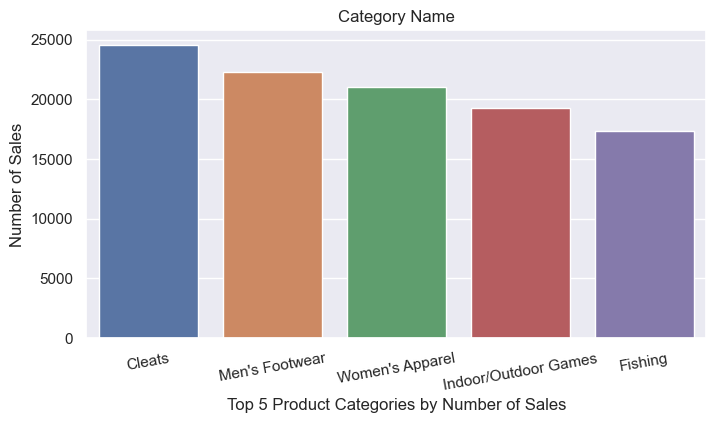

In [149]:
#Top 5 categories in Sales Shipment Data

plt.figure(figsize=(8,4))
sns.set(style='darkgrid')

top_categories = dfi['category_name'].value_counts().head(5)
sns.barplot(dfi,x=top_categories.index,y=top_categories.values)
plt.xlabel("Top 5 Product Categories by Number of Sales")
plt.ylabel("Number of Sales")
plt.title("Category Name")
plt.xticks(rotation=10)
plt.show()

In [150]:
delivery_status_counts = dfi['delivery_status'].value_counts()

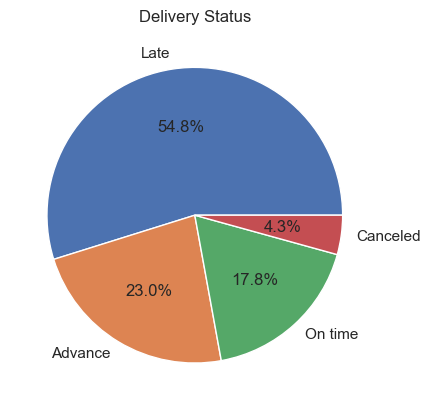

In [163]:
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%')
plt.title('Delivery Status')
plt.show()

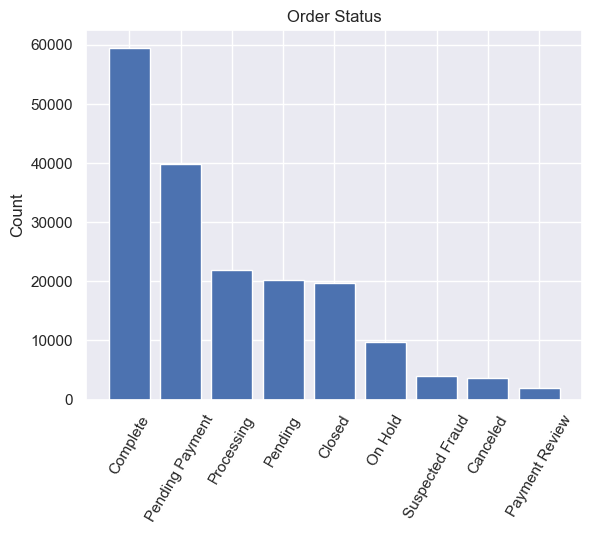

In [166]:
order_status_counts = dfi['order_status'].value_counts()
plt.bar(order_status_counts.index, order_status_counts)
plt.title('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [162]:
sns.set(style='darkgrid')
late_delivery_risk_counts = dfi['late_delivery_risk'].value_counts()
plt.pie(late_delivery_risk_counts, labels=late_delivery_risk_counts.index, autopct='%1.1f%%')
plt.title('Late Delivery Risk')
plt.show()

Key Points of the Case Study:
* Inventory Management and Sales Performance: This case study focused on analyzing data related to inventory management and sales performance.
* Exploratory Data Analysis (EDA): Key patterns, trends, and relationships within the data were uncovered through EDA, providing insights into inventory dynamics and sales efficiency.
* Predictive Modeling with XGBRegressor: The study utilized XGBRegressor, a powerful technique, to forecast and gain a deeper understanding of critical business metrics.
* Actionable Recommendations: Based on the analysis, the study offers actionable recommendations for optimizing inventory management and improving sales strategies.
* Data-Driven Decision Making: The case study highlights the importance of data-driven decision-making for tackling complex business challenges.

# Predictive Modeling

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
dfss.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Type',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer'],
      dtype='object

In [160]:
# Assuming  DataFrame is named `sales_shipment_data1`
# relevant columns exist
required_columns = ['Customer Id', 'Sales']
missing_columns = [col for col in required_columns if col not in dfss.columns]
if missing_columns:
    print(f"Error: Following required columns are missing: {', '.join(missing_columns)}")
    exit()

# Handling missing values (replace based on your data quality requirements)
dfss.dropna(subset=required_columns, inplace=True)

# Aggregate data at customer level (sum sales for each customer)
customer_sales = dfss.groupby('Customer Id')['Sales'].sum().reset_index()

# Feature engineering (create additional features as needed)
# Using domain knowledge to select relevant features and transformations
# Example: Add a 'Total Orders' feature
customer_sales['Total Orders'] = dfss.groupby('Customer Id')['Order Id'].count().reset_index()['Order Id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(customer_sales.drop('Sales', axis=1), customer_sales['Sales'],
                                                test_size=0.2, random_state=42)

# Build and evaluate models (try different models and parameters)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} model:")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R-squared: {r2:.3f}")

# Visualize predictions (scatter plot with actual vs. predicted sales)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.7)
plt.plot(y_test, y_test, c='r', linewidth=1)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the best model based on evaluation metrics and consider further improvements
# Fine-tune hyperparameters, try other models, evaluate feature importance, etc.

#print("Remember to consider potential limitations and biases in your model.")
#print("Further analysis and validation are recommended before deploying.")

Linear Regression model:
Mean Squared Error: 145595.425
R-squared: 0.949
Random Forest model:
Mean Squared Error: 156352.491
R-squared: 0.945
